<a href="https://colab.research.google.com/github/cheng0908/Ovarian_Cancer_Prognosis/blob/main/Final_report_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import Package

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_selection as fs
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split

###Import Dataset

In [ ]:
#From Chirs's drive
df_ori = pd.read_csv("/content/drive/MyDrive/智慧醫療/Final_Report/Datasets/Dataset_3.csv")
df_ori

,Geneid,N1,N2,T1,T2,T3,T4
0,A1BG,7,12,35,22,41,46
1,A1BG-AS1,0,0,7,0,4,5
2,A1CF,1,21,43,16,37,32
3,A2M,10,10,43,312,51,56
4,A2M-AS1,0,0,4,0,5,4
...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61
28022,ZYG11B,1,362,90,416,135,99
28023,ZYX,24,0,18,40,2,40
28024,ZZEF1,72,65,121,68,98,190


In [ ]:
# #From Tam's drive
# df_ori = pd.read_csv("/content/Dataset_3.csv")
# df_ori

###Data Checking

In [ ]:
df_ori.describe()

,N1,N2,T1,T2,T3,T4
count,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000
mean,18.046849,26.375009,27.834190,53.482516,26.949012,46.020659
std,63.183212,165.972202,67.068825,746.548294,95.228727,1041.508054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,1.000000,2.000000,7.000000
50%,0.000000,4.000000,16.000000,12.000000,13.000000,22.000000
75%,27.000000,25.000000,39.000000,36.000000,37.000000,49.000000
max,6473.000000,11743.000000,9465.000000,105727.000000,14654.000000,145957.000000


In [ ]:
temp_df = df_ori.describe()
col = temp_df.columns
temp_df = temp_df.T
temp_df['label'] = col
temp_df

,count,mean,std,min,25%,50%,75%,max,label
N1,28026.0,18.046849,63.183212,0.0,0.0,0.0,27.0,6473.0,N1
N2,28026.0,26.375009,165.972202,0.0,0.0,4.0,25.0,11743.0,N2
T1,28026.0,27.834190,67.068825,0.0,4.0,16.0,39.0,9465.0,T1
T2,28026.0,53.482516,746.548294,0.0,1.0,12.0,36.0,105727.0,T2
T3,28026.0,26.949012,95.228727,0.0,2.0,13.0,37.0,14654.0,T3
T4,28026.0,46.020659,1041.508054,0.0,7.0,22.0,49.0,145957.0,T4


In [ ]:
temp_df = temp_df.loc[temp_df.index[2:]][:]
temp_df

,count,mean,std,min,25%,50%,75%,max,label
T1,28026.0,27.834190,67.068825,0.0,4.0,16.0,39.0,9465.0,T1
T2,28026.0,53.482516,746.548294,0.0,1.0,12.0,36.0,105727.0,T2
T3,28026.0,26.949012,95.228727,0.0,2.0,13.0,37.0,14654.0,T3
T4,28026.0,46.020659,1041.508054,0.0,7.0,22.0,49.0,145957.0,T4


In [ ]:
temp_df.iloc[0][:]

N1    18.046849
N2    26.375009
T1    27.834190
T2    53.482516
T3    26.949012
T4    46.020659
Name: mean, dtype: float64

<AxesSubplot: xlabel='label', ylabel='max'>

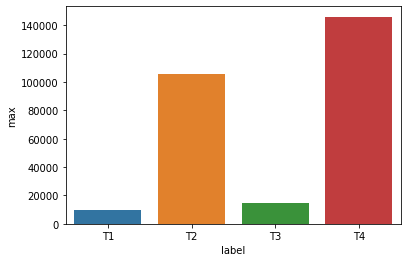

In [ ]:
sns.barplot(data=temp_df, x='label', y='max')

<AxesSubplot: xlabel='label', ylabel='mean'>

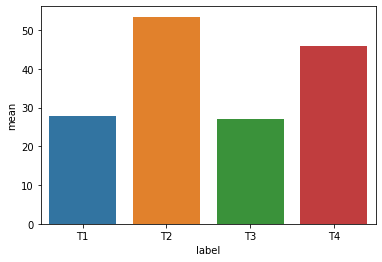

In [ ]:
sns.barplot(data=temp_df, x='label', y='mean')

<AxesSubplot: xlabel='label', ylabel='std'>

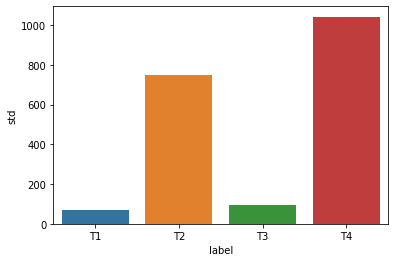

In [ ]:
sns.barplot(data=temp_df, x='label', y='std')

In [ ]:
# sns.boxplot(x ='day', y ='total_bill', data = df, hue ='smoker')

In [ ]:
col = df_ori.columns
temp_df = df_ori.T
temp_df['label'] = col
temp_df

,0,1,2,3,4,5,6,7,8,9,...,28017,28018,28019,28020,28021,28022,28023,28024,28025,label
Geneid,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Geneid
N1,7,0,1,10,0,119,44,0,0,0,...,0,0,0,26,37,1,24,72,76,N1
N2,12,0,21,10,0,45,0,0,0,12,...,0,19,0,14,48,362,0,65,31,N2
T1,35,7,43,43,4,131,18,25,17,6,...,26,17,15,18,39,90,18,121,25,T1
T2,22,0,16,312,0,50,14,2,30,9,...,8,0,5,9,45,416,40,68,20,T2
T3,41,4,37,51,5,100,15,13,9,15,...,3,7,2,15,57,135,2,98,46,T3
T4,46,5,32,56,4,75,8,20,34,26,...,17,19,22,42,61,99,40,190,74,T4


In [ ]:
col = temp_df.iloc[0][:].to_list()

In [ ]:
temp_df.columns=col
temp_df.drop(labels=['Geneid'], inplace=True, axis=0)
temp_df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Geneid
N1,7,0,1,10,0,119,44,0,0,0,...,0,0,0,26,37,1,24,72,76,N1
N2,12,0,21,10,0,45,0,0,0,12,...,0,19,0,14,48,362,0,65,31,N2
T1,35,7,43,43,4,131,18,25,17,6,...,26,17,15,18,39,90,18,121,25,T1
T2,22,0,16,312,0,50,14,2,30,9,...,8,0,5,9,45,416,40,68,20,T2
T3,41,4,37,51,5,100,15,13,9,15,...,3,7,2,15,57,135,2,98,46,T3
T4,46,5,32,56,4,75,8,20,34,26,...,17,19,22,42,61,99,40,190,74,T4


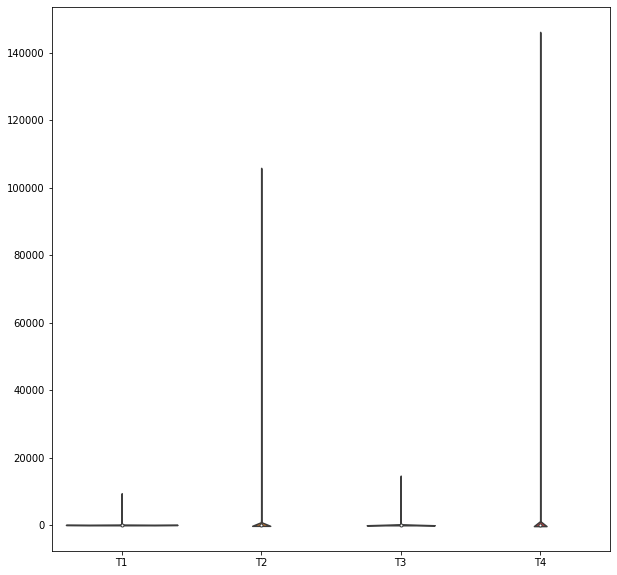

In [ ]:
#Violin Plot
plt.figure(figsize=(10,10))
sns.violinplot(data=df_ori[['T1', 'T2', 'T3', 'T4']])
plt.show()

<AxesSubplot: >

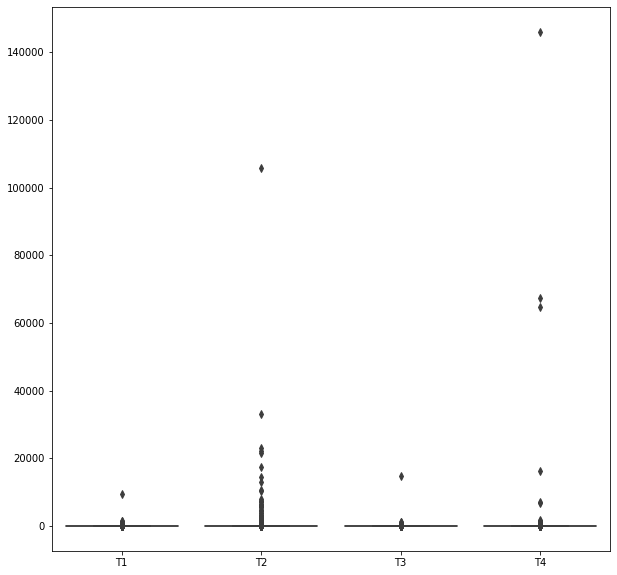

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_ori[['T1', 'T2', 'T3', 'T4']])

In [ ]:
sns.barplot(x='mean', data=df_ori.describe().drop(labels=['25%', '50%', '75%', 'min', 'max', 'count']))

ValueError: ignored

In [ ]:
df_ori['Geneid'].nunique()

28026

In [ ]:
#check missing values
df_ori.isnull().sum()

Geneid    0
N1        0
N2        0
T1        0
T2        0
T3        0
T4        0
dtype: int64

###Part 1

####Import packages and define function

In [ ]:
#packages
import numpy as np
from scipy import stats

In [ ]:
#Functions
def trade_off(value, r):
  if value > r['trade_off']:
    return "H"
  elif r['mean'] < value <= r['trade_off']:
    return "N2"
  else:
    return "N"


def chi2_test(df, _return=False):
  stat, p, dof, expected = stats.chi2_contingency(observed=df)
  # contingency table
  print('dof=%d' % dof)
  # print(expected)

  # interpret test-statistic
  prob = 0.95
  critical = stats.chi2.ppf(prob, dof)
  print('\nprobability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')

  # interpret p-value
  alpha = 1.0 - prob
  print('\nsignificance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')

  if _return:
    return stat, p, dof, expected

In [ ]:
def count_values(df, col_list):
  temp_df_concat = pd.DataFrame()

  for col in col_list:
    temp_df_2_temp = df[[col]].value_counts().to_frame()
    temp_df_2_temp.columns = [col]
    temp_df_concat = pd.concat([temp_df_concat, temp_df_2_temp], axis=1)
    temp_df_concat.fillna(0, inplace=True)
    temp_df_concat = temp_df_concat.astype(int)
  return temp_df_concat

####Calculate the mean and SD of each row

In [ ]:
df_process = df_ori.copy()
df_process['mean'] = df_process.drop(columns=['Geneid']).mean(axis=1)
df_process

,Geneid,N1,N2,T1,T2,T3,T4,mean
0,A1BG,7,12,35,22,41,46,27.166667
1,A1BG-AS1,0,0,7,0,4,5,2.666667
2,A1CF,1,21,43,16,37,32,25.000000
3,A2M,10,10,43,312,51,56,80.333333
4,A2M-AS1,0,0,4,0,5,4,2.166667
...,...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61,47.833333
28022,ZYG11B,1,362,90,416,135,99,183.833333
28023,ZYX,24,0,18,40,2,40,20.666667
28024,ZZEF1,72,65,121,68,98,190,102.333333


In [ ]:
df_process['SD'] = df_process.drop(columns=['Geneid', 'mean']).std(axis=1)
df_process

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD
0,A1BG,7,12,35,22,41,46,27.166667,15.942605
1,A1BG-AS1,0,0,7,0,4,5,2.666667,3.076795
2,A1CF,1,21,43,16,37,32,25.000000,15.427249
3,A2M,10,10,43,312,51,56,80.333333,115.246981
4,A2M-AS1,0,0,4,0,5,4,2.166667,2.401388
...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61,47.833333,9.600347
28022,ZYG11B,1,362,90,416,135,99,183.833333,165.806413
28023,ZYX,24,0,18,40,2,40,20.666667,17.557525
28024,ZZEF1,72,65,121,68,98,190,102.333333,48.052749


####Plot mean and standard deviation data

In [ ]:
df_process.describe()

,N1,N2,T1,T2,T3,T4,mean,SD
count,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000
mean,18.046849,26.375009,27.834190,53.482516,26.949012,46.020659,33.118039,31.387257
std,63.183212,165.972202,67.068825,746.548294,95.228727,1041.508054,241.462164,516.400810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.408248
25%,0.000000,0.000000,4.000000,1.000000,2.000000,7.000000,4.500000,5.231316
50%,0.000000,4.000000,16.000000,12.000000,13.000000,22.000000,15.666667,12.361230
75%,27.000000,25.000000,39.000000,36.000000,37.000000,49.000000,36.333333,22.572107
max,6473.000000,11743.000000,9465.000000,105727.000000,14654.000000,145957.000000,26268.000000,58674.347281


In [ ]:
df_process.describe(percentiles=[.9,.95,.99])

,N1,N2,T1,T2,T3,T4,mean,SD
count,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000
mean,18.046849,26.375009,27.834190,53.482516,26.949012,46.020659,33.118039,31.387257
std,63.183212,165.972202,67.068825,746.548294,95.228727,1041.508054,241.462164,516.400810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.408248
50%,0.000000,4.000000,16.000000,12.000000,13.000000,22.000000,15.666667,12.361230
90%,53.000000,56.000000,68.000000,80.000000,70.000000,83.000000,66.083333,38.230006
95%,76.750000,89.000000,90.750000,138.000000,97.000000,110.000000,93.333333,57.476008
99%,131.000000,255.750000,148.000000,585.750000,165.000000,187.000000,208.125000,244.876565
max,6473.000000,11743.000000,9465.000000,105727.000000,14654.000000,145957.000000,26268.000000,58674.347281


In [ ]:
df_process[df_process['SD'] > df_process.describe()["SD"]['25%']]

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD
0,A1BG,7,12,35,22,41,46,27.166667,15.942605
2,A1CF,1,21,43,16,37,32,25.000000,15.427249
3,A2M,10,10,43,312,51,56,80.333333,115.246981
5,A2ML1,119,45,131,50,100,75,86.666667,35.791992
6,A2MP1,44,0,18,14,15,8,16.500000,14.909728
...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61,47.833333,9.600347
28022,ZYG11B,1,362,90,416,135,99,183.833333,165.806413
28023,ZYX,24,0,18,40,2,40,20.666667,17.557525
28024,ZZEF1,72,65,121,68,98,190,102.333333,48.052749


In [ ]:
df_process[df_process['SD'] > df_process.describe()["SD"]['75%']]

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD
3,A2M,10,10,43,312,51,56,80.333333,115.246981
5,A2ML1,119,45,131,50,100,75,86.666667,35.791992
12,AACS,0,0,91,56,28,92,44.500000,41.913005
13,AACSP1,30,31,38,17,72,76,44.000000,24.240462
22,AADAT,75,32,33,2,26,17,30.833333,24.506462
...,...,...,...,...,...,...,...,...,...
28010,ZSWIM7,81,10,22,12,32,15,28.666667,26.860132
28015,ZW10,97,63,45,39,110,80,72.333333,28.394835
28022,ZYG11B,1,362,90,416,135,99,183.833333,165.806413
28024,ZZEF1,72,65,121,68,98,190,102.333333,48.052749


In [ ]:
df_process[df_process['SD'] > df_process.describe(percentiles=[.95])["SD"]['95%'] ]

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD
3,A2M,10,10,43,312,51,56,80.333333,115.246981
24,AAK1,117,263,60,735,134,147,242.666667,250.170075
30,AARS1,64,17,116,67,67,187,86.333333,58.424881
44,ABCA13,43,151,214,171,229,152,160.000000,65.775375
46,ABCA2,75,0,47,16,15,175,54.666667,64.821807
...,...,...,...,...,...,...,...,...,...
27949,ZNHIT1,0,1,15,208,7,30,43.500000,81.345559
27980,ZRSR2,0,47,32,177,42,27,54.166667,62.371201
28004,ZSWIM1,14,620,25,179,32,12,147.000000,240.323116
28007,ZSWIM4,0,24,166,103,88,203,97.333333,78.551045


In [ ]:
temp_df = df_process[df_process['SD'] > df_process.describe(percentiles=[.98])["SD"]['98%']]
temp_df

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD
24,AAK1,117,263,60,735,134,147,242.666667,250.170075
136,ABTB1,48,19,24,379,7,28,84.166667,145.059183
174,ACIN1,35,120,95,617,93,139,183.166667,215.410693
175,ACKR1,0,0,3,1668,0,6,279.500000,680.227535
194,ACOT9,53,642,52,487,94,64,232.000000,262.615308
...,...,...,...,...,...,...,...,...,...
27921,ZNF844,29,770,51,335,50,32,211.166667,298.175396
27943,ZNF91,25,548,25,398,68,69,188.833333,226.006563
27948,ZNFX1,3,138,69,607,59,78,159.000000,223.670293
28004,ZSWIM1,14,620,25,179,32,12,147.000000,240.323116


<ipython-input-33-cd0de6b87fe2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['lognorm_SD'] = np.log(temp_df['SD'])


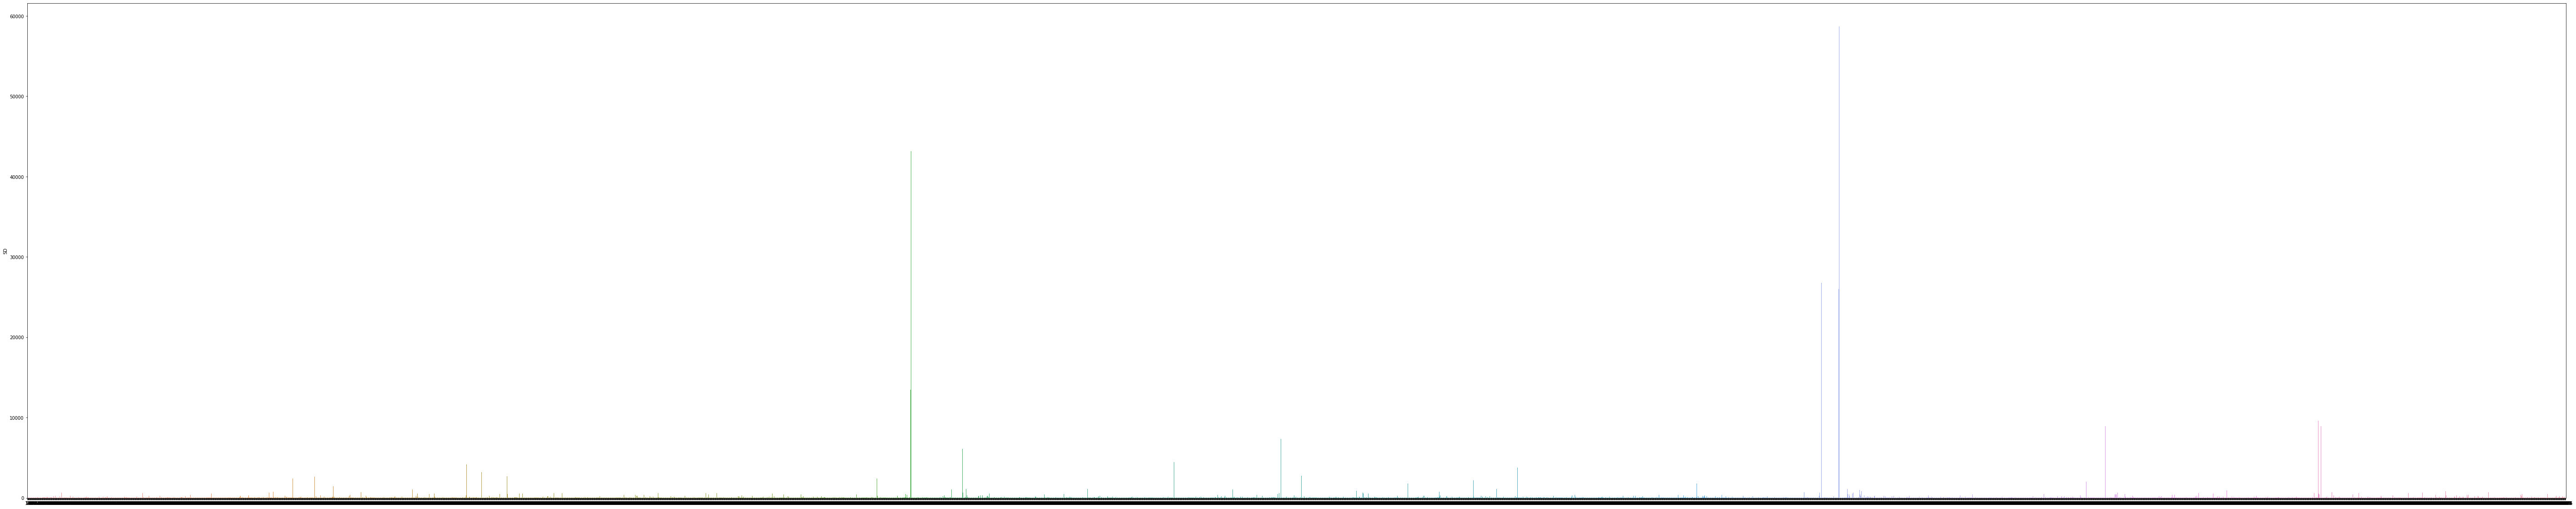

In [ ]:
temp_df = df_process[df_process['SD'] > df_process.describe()["SD"]['75%'] ]
temp_df['lognorm_SD'] = np.log(temp_df['SD'])
plt.figure(figsize=(100,20))
sns.barplot(data=temp_df, x=temp_df.index, y='SD')
plt.show()

In [ ]:
temp_df = df_process[df_process['SD'] > df_process.describe(percentiles=[.99])["SD"]['99%']]
temp_df

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD
24,AAK1,117,263,60,735,134,147,242.666667,250.170075
175,ACKR1,0,0,3,1668,0,6,279.500000,680.227535
194,ACOT9,53,642,52,487,94,64,232.000000,262.615308
255,ACTN4,0,89,49,1643,39,105,320.833333,648.800868
331,ADAMTS4,0,419,116,643,103,121,233.666667,244.996054
...,...,...,...,...,...,...,...,...,...
27566,ZNF429,60,977,99,580,107,83,317.666667,378.733503
27570,ZNF431,5,789,117,221,138,113,230.500000,282.172819
27571,ZNF432,17,1216,36,623,35,17,324.000000,498.001606
27823,ZNF714,68,1337,89,307,143,64,334.666667,499.379081


In [ ]:
index = temp_df.index[:50].to_list()
index[:10]

[24, 175, 194, 255, 331, 546, 797, 804, 896, 947]

In [ ]:
temp_df = temp_df.loc[temp_df.index[:50]].copy()
temp_df

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD
24,AAK1,117,263,60,735,134,147,242.666667,250.170075
175,ACKR1,0,0,3,1668,0,6,279.500000,680.227535
194,ACOT9,53,642,52,487,94,64,232.000000,262.615308
255,ACTN4,0,89,49,1643,39,105,320.833333,648.800868
331,ADAMTS4,0,419,116,643,103,121,233.666667,244.996054
546,AHNAK,124,97,44,125,55,781,204.333333,284.541503
797,ANKRD11,27,299,43,831,25,187,235.333333,311.718890
804,ANKRD17,21,236,96,913,110,123,249.833333,332.159851
896,ANP32B,0,667,16,1542,37,42,384.000000,623.106090
947,AP2S1,15,28,51,704,39,71,151.333333,271.432251


In [ ]:
# temp_df = df_process[df_process['SD'] > df_process.describe(percentiles=[.99])["SD"]['99%']]
# temp_df['lognorm_SD'] = np.log(temp_df['SD'])
# plt.figure(figsize=(100,20))
# sns.barplot(data=temp_df, x=temp_df.index, y='SD')
# plt.show()

In [ ]:
# temp_df.columns[1:7]

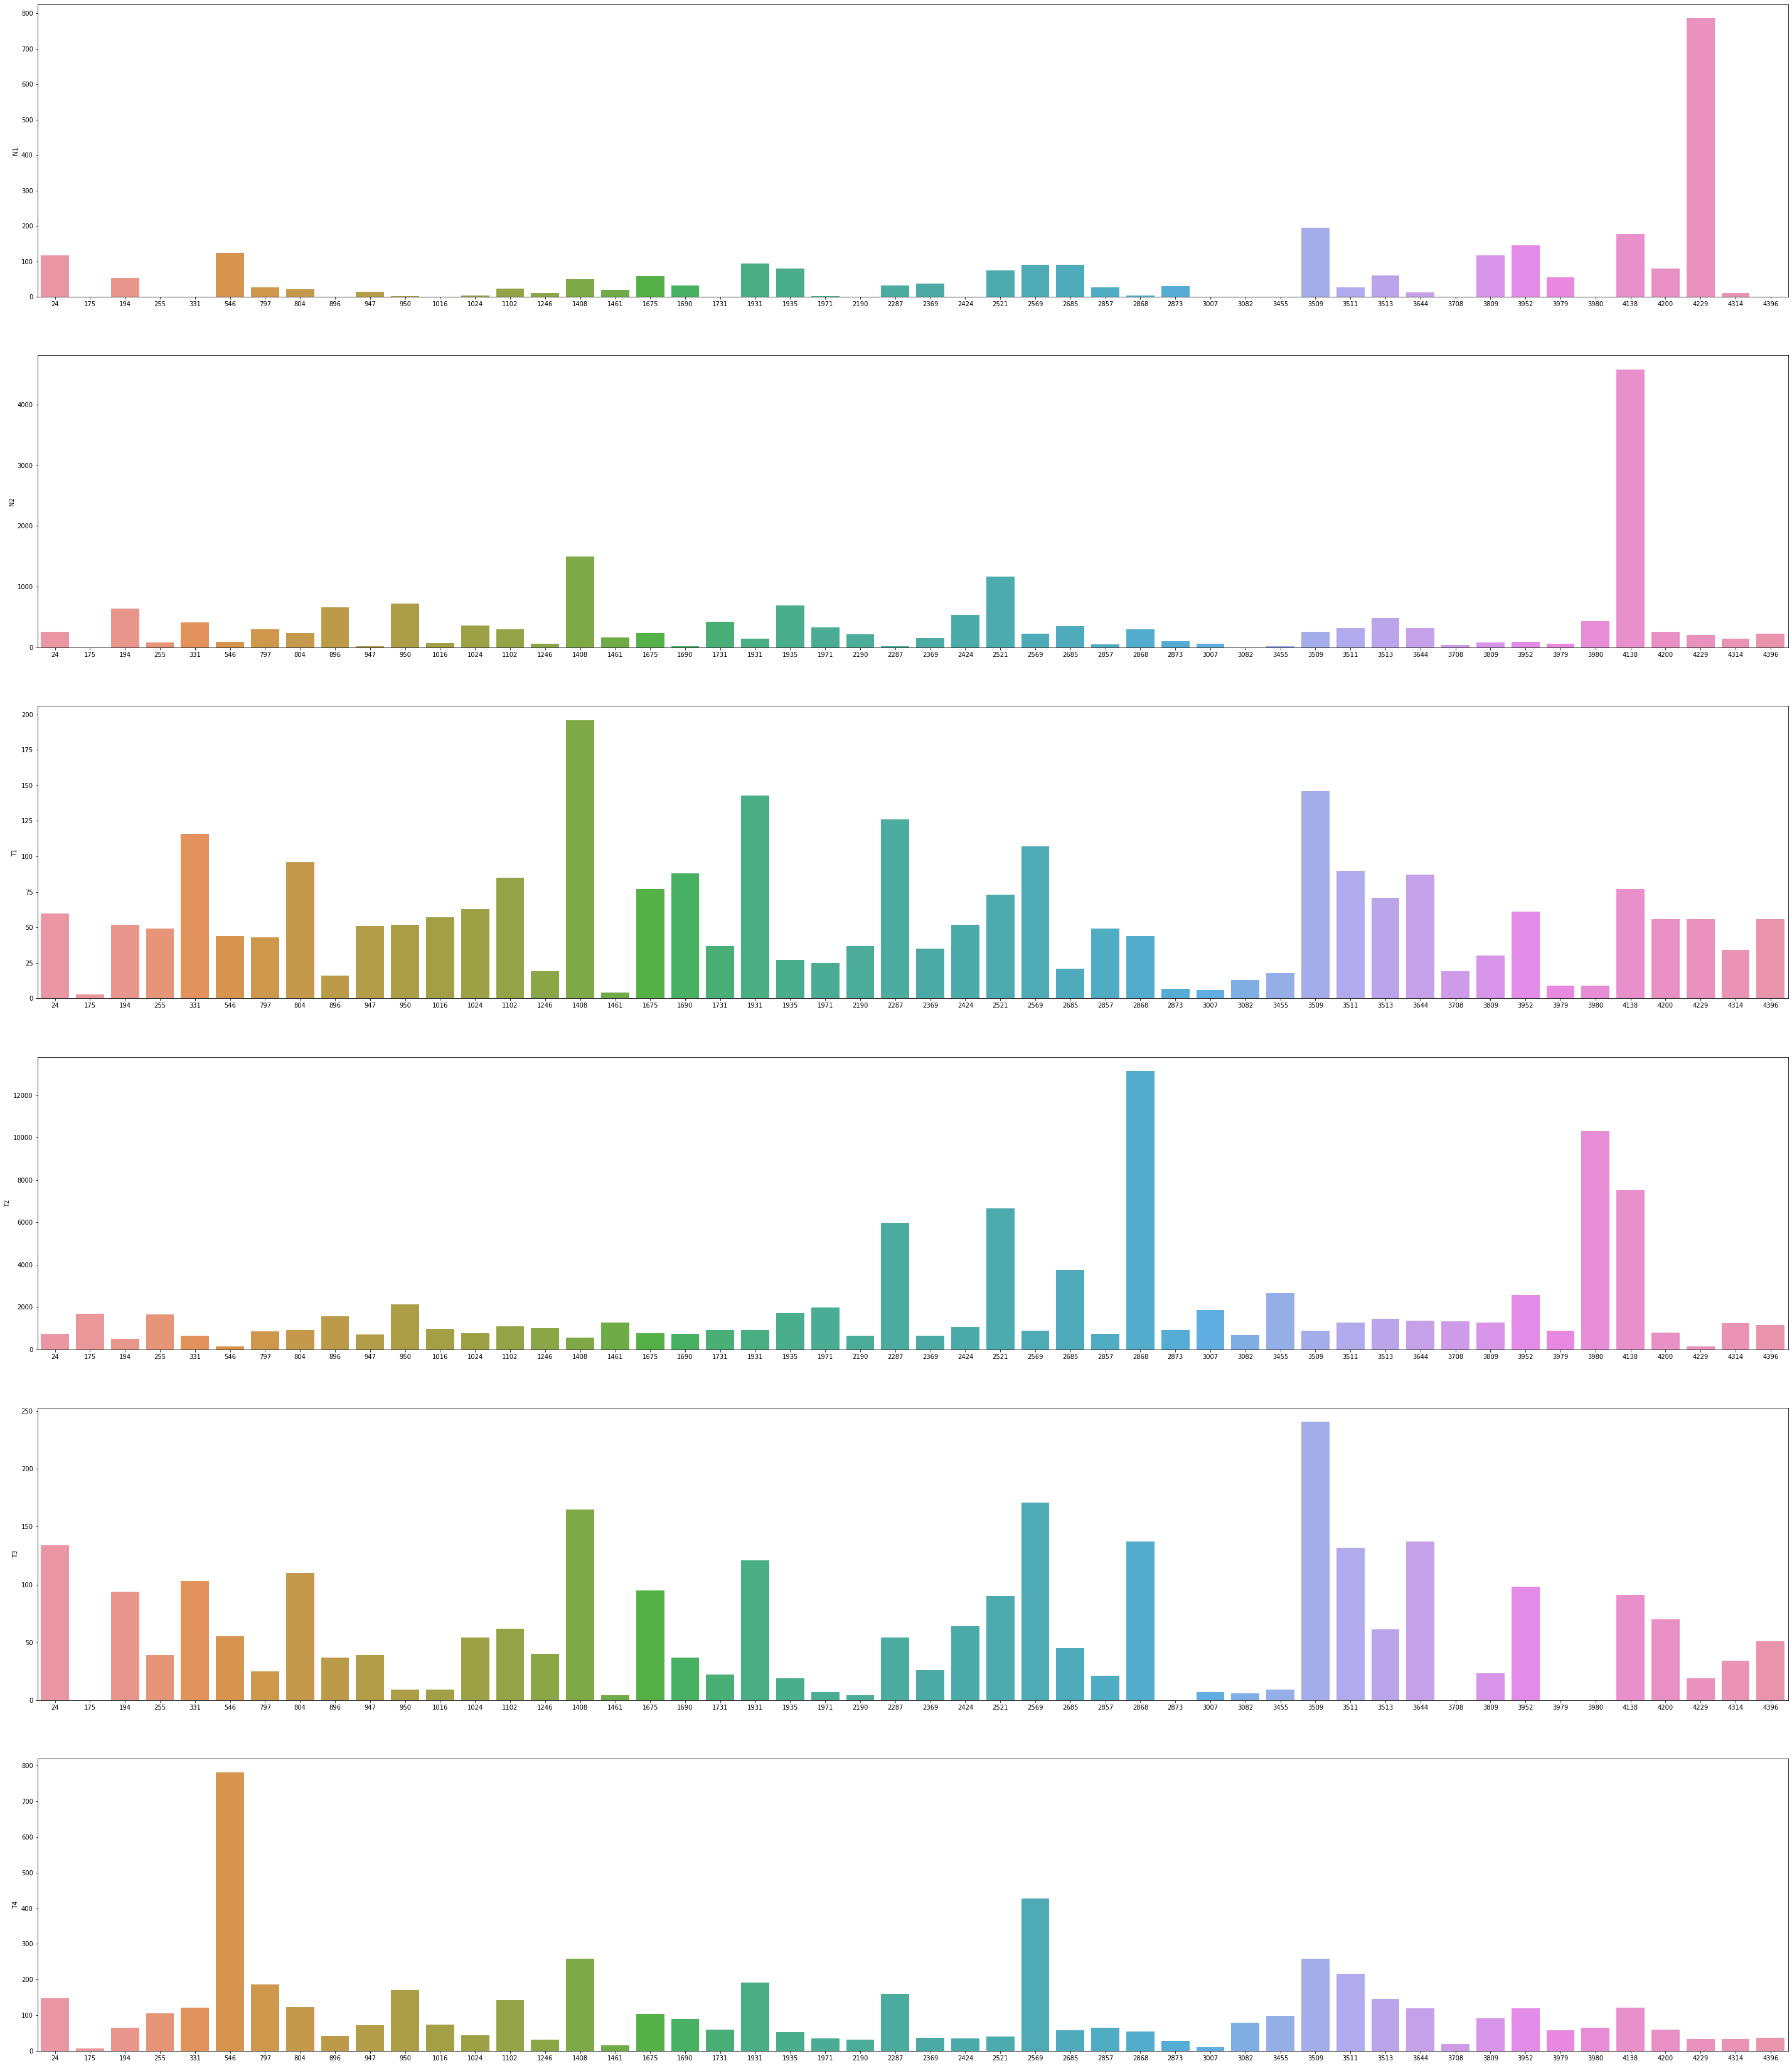

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(50,60))
for i, col in enumerate(temp_df.columns[1:7]):
    sns.barplot(data=temp_df, x=temp_df.index, y=col, ax=ax[i])

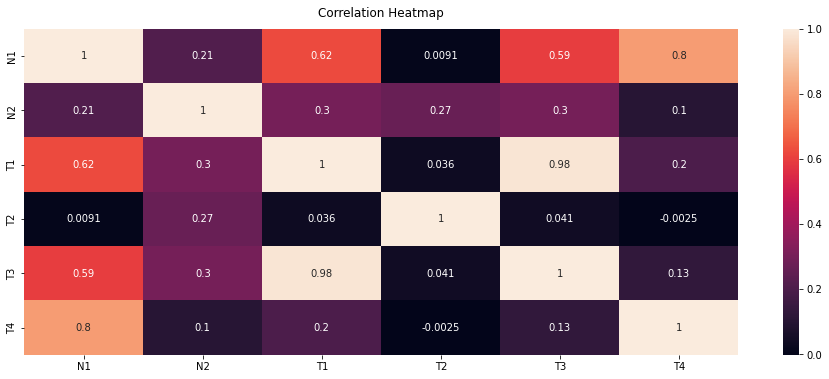

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(temp_df[['N1', 'N2', 'T1', 'T2', 'T3', 'T4']].corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

####Set label

In [ ]:
df_backup_process = df_process.copy()
# df_process = df_backup_process.copy()

In [ ]:
df_process = df_process[df_process['SD'] > df_process.describe(percentiles=[.99])["SD"]['99%']].copy()
df_process.describe()

,N1,N2,T1,T2,T3,T4,mean,SD
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,116.156584,713.797153,105.437722,2262.715302,128.925267,1214.750890,756.963820,1368.927253
std,534.968548,1455.400484,576.391766,7104.298643,879.471845,10345.140828,2280.068209,4982.550661
min,0.000000,0.000000,0.000000,8.000000,0.000000,3.000000,114.833333,244.996054
25%,3.000000,104.000000,21.000000,721.000000,14.000000,40.000000,211.500000,304.709315
50%,35.000000,277.000000,49.000000,1020.000000,47.000000,76.000000,286.833333,430.929112
75%,75.000000,759.000000,87.000000,1575.000000,104.000000,128.000000,431.666667,662.216707
max,6473.000000,11743.000000,9465.000000,105727.000000,14654.000000,145957.000000,26268.000000,58674.347281


In [ ]:
df_process['trade_off'] = df_process['mean'] + 2*df_process['SD']
df_process

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD,trade_off
24,AAK1,117,263,60,735,134,147,242.666667,250.170075,743.006818
175,ACKR1,0,0,3,1668,0,6,279.500000,680.227535,1639.955071
194,ACOT9,53,642,52,487,94,64,232.000000,262.615308,757.230616
255,ACTN4,0,89,49,1643,39,105,320.833333,648.800868,1618.435070
331,ADAMTS4,0,419,116,643,103,121,233.666667,244.996054,723.658775
...,...,...,...,...,...,...,...,...,...,...
27566,ZNF429,60,977,99,580,107,83,317.666667,378.733503,1075.133674
27570,ZNF431,5,789,117,221,138,113,230.500000,282.172819,794.845639
27571,ZNF432,17,1216,36,623,35,17,324.000000,498.001606,1320.003213
27823,ZNF714,68,1337,89,307,143,64,334.666667,499.379081,1333.424829


In [ ]:
temp_df = df_process.copy()
temp_df.columns[1:7]

Index(['N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
for col in temp_df.columns[1:7]:
  temp_df[col].astype(float)
  temp_df[col] = temp_df.apply(lambda r: trade_off(r[col], r), axis=1)

temp_df

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD,trade_off
24,AAK1,N,N2,N,N2,N,N,242.666667,250.170075,743.006818
175,ACKR1,N,N,N,H,N,N,279.500000,680.227535,1639.955071
194,ACOT9,N,N2,N,N2,N,N,232.000000,262.615308,757.230616
255,ACTN4,N,N,N,H,N,N,320.833333,648.800868,1618.435070
331,ADAMTS4,N,N2,N,N2,N,N,233.666667,244.996054,723.658775
...,...,...,...,...,...,...,...,...,...,...
27566,ZNF429,N,N2,N,N2,N,N,317.666667,378.733503,1075.133674
27570,ZNF431,N,N2,N,N,N,N,230.500000,282.172819,794.845639
27571,ZNF432,N,N2,N,N2,N,N,324.000000,498.001606,1320.003213
27823,ZNF714,N,H,N,N,N,N,334.666667,499.379081,1333.424829


In [ ]:
temp_df[temp_df['T4'] == 'H']

,Geneid,N1,N2,T1,T2,T3,T4,mean,SD,trade_off
546,AHNAK,N,N,N,N,N,H,204.333333,284.541503,773.416338
20804,RMRP,N,N,N,N,N,H,121.666667,291.176006,704.018679
20806,RN7SK,N,N,N,N,N,H,338.500000,680.151968,1698.803937
20807,RN7SL1,N,N,N,N,N,H,1185.166667,2741.392304,6667.951275
20808,RN7SL2,N,N,N,N,N,H,1269.666667,2850.321853,6970.310373
20811,RNA45SN5,N,N,N,N,N,H,12647.166667,26811.404301,66269.975268
20946,RNR1,N,N,N,N,N,H,11623.166667,25987.234639,63597.635944
20947,RNR2,N,N,N,N,N,H,26268.000000,58674.347281,143616.694561
21113,RPPH1,N,N,N,N,N,H,229.666667,451.482742,1132.632151


####statistics results

In [ ]:
temp_df.columns[1:7]

Index(['N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
temp_df_concat = pd.DataFrame()

for col in temp_df.columns[1:7]:
  temp_df_2_temp = temp_df[[col]].value_counts().to_frame()
  temp_df_2_temp.columns = [col]
  temp_df_concat = pd.concat([temp_df_concat, temp_df_2_temp], axis=1)
  temp_df_concat.fillna(0, inplace=True)
  temp_df_concat = temp_df_concat.astype(int)
temp_df_concat

,N1,N2,T1,T2,T3,T4
H,0,7,0,126,0,9
N,277,157,281,20,278,264
N2,4,117,0,135,3,8


In [ ]:
chi2_test(df=temp_df_concat)

dof=10

probability=0.950, critical=18.307, stat=1249.270
Dependent (reject H0)

significance=0.050, p=0.000
Dependent (reject H0)


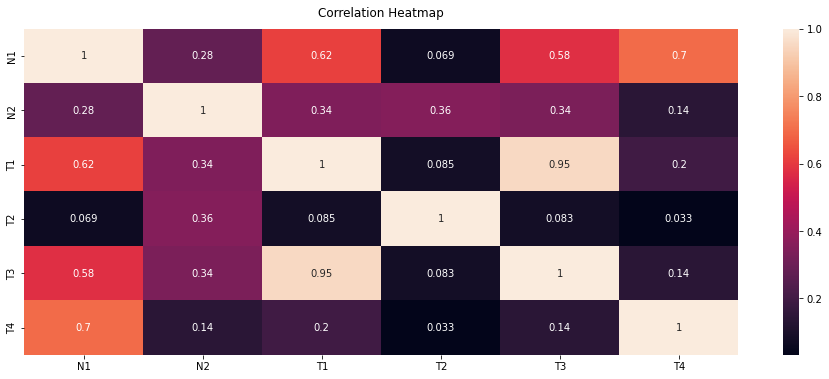

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_ori[['N1', 'N2', 'T1', 'T2', 'T3', 'T4']].corr(), annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

###Part 1-2 remove suspect N1&N2 genes

####Import packages and define function

In [ ]:
#Functions
def trade_off(value, r):
  if value > r['trade_off']:
    return "H"
  elif r['mean'] < value <= r['trade_off']:
    return "N2"
  else:
    return "N"


In [ ]:
def diff_N1nN2_byScale(r):
  if int(r['N1']) == 0:
    return r['N2']
  elif int(r['N2']) == 0:
    return r['N1']
  else:
    N1overN2 = int(r['N1']) / int(r['N2'])
    N2overN1 = int(r['N2']) / int(r['N1'])
    final_outcome = max(N1overN2, N2overN1)
    return final_outcome

####Remove supect genes

In [ ]:
df_process_3 = df_ori.copy()
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4
0,A1BG,7,12,35,22,41,46
1,A1BG-AS1,0,0,7,0,4,5
2,A1CF,1,21,43,16,37,32
3,A2M,10,10,43,312,51,56
4,A2M-AS1,0,0,4,0,5,4
...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61
28022,ZYG11B,1,362,90,416,135,99
28023,ZYX,24,0,18,40,2,40
28024,ZZEF1,72,65,121,68,98,190


In [ ]:
df_process_3['diff_N1nN2_byScale'] = df_process_3.apply(diff_N1nN2_byScale, axis=1)
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale
0,A1BG,7,12,35,22,41,46,1.714286
1,A1BG-AS1,0,0,7,0,4,5,0.000000
2,A1CF,1,21,43,16,37,32,21.000000
3,A2M,10,10,43,312,51,56,1.000000
4,A2M-AS1,0,0,4,0,5,4,0.000000
...,...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61,1.297297
28022,ZYG11B,1,362,90,416,135,99,362.000000
28023,ZYX,24,0,18,40,2,40,24.000000
28024,ZZEF1,72,65,121,68,98,190,1.107692


In [ ]:
df_process_3['diff_N1nN2'] = abs(df_process_3['N1'] - df_process_3['N2'])
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
2,A1CF,1,21,43,16,37,32,21.000000,20
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61,1.297297,11
28022,ZYG11B,1,362,90,416,135,99,362.000000,361
28023,ZYX,24,0,18,40,2,40,24.000000,24
28024,ZZEF1,72,65,121,68,98,190,1.107692,7


In [ ]:
df_process_3.describe()

,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
count,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000
mean,18.046849,26.375009,27.834190,53.482516,26.949012,46.020659,11.375524,25.954364
std,63.183212,165.972202,67.068825,746.548294,95.228727,1041.508054,81.496408,158.408316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,1.000000,2.000000,7.000000,0.000000,0.000000
50%,0.000000,4.000000,16.000000,12.000000,13.000000,22.000000,2.000000,9.000000
75%,27.000000,25.000000,39.000000,36.000000,37.000000,49.000000,11.666667,28.000000
max,6473.000000,11743.000000,9465.000000,105727.000000,14654.000000,145957.000000,10636.000000,11674.000000


choose mean as trade off value

In [ ]:
df_process_3.describe().loc['mean']['diff_N1nN2']

25.954363805038177

In [ ]:
df_process_3[df_process_3['diff_N1nN2'] < 25.954364]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
2,A1CF,1,21,43,16,37,32,21.000000,20
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
...,...,...,...,...,...,...,...,...,...
28019,ZXDB,0,0,15,5,2,22,0.000000,0
28020,ZXDC,26,14,18,9,15,42,1.857143,12
28021,ZYG11A,37,48,39,45,57,61,1.297297,11
28023,ZYX,24,0,18,40,2,40,24.000000,24


In [ ]:
df_process_3[df_process_3['diff_N1nN2_byScale'] < 11.375524]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
5,A2ML1,119,45,131,50,100,75,2.644444,74
...,...,...,...,...,...,...,...,...,...
28019,ZXDB,0,0,15,5,2,22,0.000000,0
28020,ZXDC,26,14,18,9,15,42,1.857143,12
28021,ZYG11A,37,48,39,45,57,61,1.297297,11
28024,ZZEF1,72,65,121,68,98,190,1.107692,7


In [ ]:
df_process_3 = df_process_3[(df_process_3['diff_N1nN2_byScale'] < 11.375524) & (df_process_3['diff_N1nN2'] < 25.954364)].copy()
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
7,A3GALT2,0,0,25,2,13,20,0.000000,0
...,...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,0.000000,0
28019,ZXDB,0,0,15,5,2,22,0.000000,0
28020,ZXDC,26,14,18,9,15,42,1.857143,12
28021,ZYG11A,37,48,39,45,57,61,1.297297,11


In [ ]:
# trade_off_value_1 = df_process_3_2['diff_N1&N2'].describe()['mean']

In [ ]:
# df_process_3.drop(columns=['diff_N1nN2_byScale', 'diff_N1nN2'], inplace=True)
# df_process_3

####Calculate the mean and SD of each row

In [ ]:
df_process_3['mean'] = df_process_3.drop(columns=['diff_N1nN2','diff_N1nN2_byScale','Geneid']).mean(axis=1)
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean
0,A1BG,7,12,35,22,41,46,1.714286,5,27.166667
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0,2.666667
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333
4,A2M-AS1,0,0,4,0,5,4,0.000000,0,2.166667
7,A3GALT2,0,0,25,2,13,20,0.000000,0,10.000000
...,...,...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,0.000000,0,9.000000
28019,ZXDB,0,0,15,5,2,22,0.000000,0,7.333333
28020,ZXDC,26,14,18,9,15,42,1.857143,12,20.666667
28021,ZYG11A,37,48,39,45,57,61,1.297297,11,47.833333


In [ ]:
df_process_3['SD'] = df_process_3.drop(columns=['diff_N1nN2','diff_N1nN2_byScale','Geneid']).std(axis=1)
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
0,A1BG,7,12,35,22,41,46,1.714286,5,27.166667,14.553541
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0,2.666667,2.808717
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619
4,A2M-AS1,0,0,4,0,5,4,0.000000,0,2.166667,2.192158
7,A3GALT2,0,0,25,2,13,20,0.000000,0,10.000000,9.983319
...,...,...,...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,0.000000,0,9.000000,9.591663
28019,ZXDB,0,0,15,5,2,22,0.000000,0,7.333333,8.319989
28020,ZXDC,26,14,18,9,15,42,1.857143,12,20.666667,10.826921
28021,ZYG11A,37,48,39,45,57,61,1.297297,11,47.833333,8.763878


####Plot mean and standard deviation data

In [ ]:
df_process_3.describe()

,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
count,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000
mean,8.940557,8.998216,19.601565,23.223559,17.865635,25.662734,1.562215,4.109449,17.382044,12.078124
std,20.662570,20.235440,27.213774,259.816707,27.739493,37.686418,2.571633,6.317754,49.308954,96.658602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.372678
25%,0.000000,0.000000,2.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.833333,2.481868
50%,0.000000,0.000000,10.000000,7.000000,6.000000,14.000000,0.000000,0.000000,7.666667,6.890009
75%,9.000000,10.000000,27.000000,22.000000,24.000000,35.000000,1.873641,7.000000,23.000000,13.875688
max,819.000000,801.000000,705.000000,33005.000000,373.000000,1725.000000,11.000000,25.000000,5511.666667,12295.396302


In [ ]:
df_process_3.describe(percentiles=[.9,.95,.99])

,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
count,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000
mean,8.940557,8.998216,19.601565,23.223559,17.865635,25.662734,1.562215,4.109449,17.382044,12.078124
std,20.662570,20.235440,27.213774,259.816707,27.739493,37.686418,2.571633,6.317754,49.308954,96.658602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.372678
50%,0.000000,0.000000,10.000000,7.000000,6.000000,14.000000,0.000000,0.000000,7.666667,6.890009
90%,33.000000,31.000000,52.000000,51.000000,51.000000,65.000000,5.000000,14.000000,44.883333,24.010587
95%,45.000000,46.000000,72.000000,81.000000,72.000000,90.000000,8.000000,19.000000,62.500000,33.504311
99%,83.000000,83.000000,118.230000,207.230000,128.000000,149.000000,11.000000,24.000000,112.166667,72.367881
max,819.000000,801.000000,705.000000,33005.000000,373.000000,1725.000000,11.000000,25.000000,5511.666667,12295.396302


In [ ]:
df_process_3[df_process_3['SD'] > df_process_3.describe()["SD"]['25%']]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
0,A1BG,7,12,35,22,41,46,1.714286,5,27.166667,14.553541
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0,2.666667,2.808717
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619
7,A3GALT2,0,0,25,2,13,20,0.000000,0,10.000000,9.983319
8,A4GALT,0,0,17,30,9,34,0.000000,0,15.000000,13.391540
...,...,...,...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,0.000000,0,9.000000,9.591663
28019,ZXDB,0,0,15,5,2,22,0.000000,0,7.333333,8.319989
28020,ZXDC,26,14,18,9,15,42,1.857143,12,20.666667,10.826921
28021,ZYG11A,37,48,39,45,57,61,1.297297,11,47.833333,8.763878


In [ ]:
df_process_3[df_process_3['SD'] > df_process_3.describe()["SD"]['75%'] ]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
0,A1BG,7,12,35,22,41,46,1.714286,5,27.166667,14.553541
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619
12,AACS,0,0,91,56,28,92,0.000000,0,44.500000,38.261164
13,AACSP1,30,31,38,17,72,76,1.033333,1,44.000000,22.128413
19,AADACL3,0,0,36,8,7,29,0.000000,0,13.333333,14.043583
...,...,...,...,...,...,...,...,...,...,...,...
28008,ZSWIM5,0,10,46,21,25,62,10.000000,10,27.333333,20.989415
28011,ZSWIM8,37,28,75,18,50,63,1.321429,9,45.166667,19.709699
28014,ZUP1,31,12,56,10,44,42,2.583333,19,32.500000,16.849827
28016,ZWILCH,11,15,37,11,36,46,1.363636,4,26.000000,14.094916


In [ ]:
df_process_3[df_process_3['SD'] > df_process_3.describe(percentiles=[.95])["SD"]['95%'] ]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619
12,AACS,0,0,91,56,28,92,0.000000,0,44.500000,38.261164
31,AARS2,3,12,36,44,7,128,4.000000,9,38.333333,42.820037
40,ABAT,28,18,85,13,69,118,1.555556,10,55.166667,38.572083
64,ABCB9,0,3,125,72,51,94,3.000000,3,57.500000,45.492673
...,...,...,...,...,...,...,...,...,...,...,...
27806,ZNF703,0,6,58,79,93,41,6.000000,6,46.166667,34.599695
27908,ZNF827,34,55,62,143,96,121,1.617647,21,85.166667,38.320650
27912,ZNF831,0,10,82,33,48,106,10.000000,10,46.500000,37.593217
27949,ZNHIT1,0,1,15,208,7,30,1.000000,1,43.500000,74.257996


In [ ]:
df_process_3[df_process_3['SD'] > df_process_3.describe(percentiles=[.98])["SD"]['98%']]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619
175,ACKR1,0,0,3,1668,0,6,0.000000,0,279.500000,620.959942
228,ACSS2,0,5,29,166,7,50,5.000000,5,42.833333,57.681357
233,ACTB,50,54,41,585,41,253,1.080000,4,170.666667,200.103862
347,ADAP2,0,8,54,163,84,50,8.000000,8,59.833333,54.198452
...,...,...,...,...,...,...,...,...,...,...,...
27093,YWHAB,28,28,47,617,50,69,1.000000,0,139.833333,213.856195
27241,ZEB2,68,93,63,459,76,134,1.367647,25,148.833333,140.680983
27354,ZNF106,116,98,115,358,100,108,1.183673,18,149.166667,93.638341
27783,ZNF678,38,37,116,88,184,148,1.027027,1,101.833333,54.087635


In [ ]:
df_process_3[df_process_3['SD'] > df_process_3.describe(percentiles=[.99])["SD"]['99%']]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619
175,ACKR1,0,0,3,1668,0,6,0.000000,0,279.500000,620.959942
233,ACTB,50,54,41,585,41,253,1.080000,4,170.666667,200.103862
369,ADCY9,0,10,79,67,35,233,10.000000,10,70.666667,77.868836
413,ADH1B,13,18,54,355,28,17,1.384615,5,80.833333,123.357768
...,...,...,...,...,...,...,...,...,...,...,...
26566,USP42,17,24,61,268,69,82,1.411765,7,86.833333,84.315710
27093,YWHAB,28,28,47,617,50,69,1.000000,0,139.833333,213.856195
27241,ZEB2,68,93,63,459,76,134,1.367647,25,148.833333,140.680983
27354,ZNF106,116,98,115,358,100,108,1.183673,18,149.166667,93.638341


In [ ]:
temp_df = df_process_3[df_process_3['SD'] > df_process_3.describe(percentiles=[.99])["SD"]['99%']]

In [ ]:
temp_df.columns[1:7]

Index(['N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
temp_df_2 = temp_df.copy()

In [ ]:
# fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(100,120))
# for i, col in enumerate(temp_df.columns[1:7]):
#     sns.barplot(data=temp_df, x=temp_df.index, y=col, ax=ax[i])

####Set label

In [ ]:
# df_backup_process = df_process.copy()
# df_process = df_backup_process.copy()

In [ ]:
df_process_3 = df_process_3[df_process_3['SD'] > df_process_3.describe(percentiles=[.99])["SD"]['99%']].copy()
df_process_3.describe()

,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,54.017241,54.120690,66.885057,612.919540,54.477011,131.304598,1.714307,9.781609,162.287356,227.571082
std,96.635689,96.916163,91.480744,2519.281585,68.425201,192.629670,1.723963,7.768210,422.418654,938.271989
min,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,40.000000,72.490612
25%,11.500000,10.000000,16.000000,251.250000,10.250000,32.000000,1.047249,3.000000,75.791667,87.613470
50%,33.000000,33.500000,41.000000,324.000000,29.500000,71.000000,1.225806,8.000000,114.333333,107.347884
75%,63.250000,60.000000,78.750000,478.250000,76.000000,168.250000,1.726010,15.000000,148.250000,157.219142
max,819.000000,801.000000,705.000000,33005.000000,373.000000,1725.000000,10.000000,25.000000,5511.666667,12295.396302


In [ ]:
df_process_3['trade_off'] = ""
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD,trade_off
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619,
175,ACKR1,0,0,3,1668,0,6,0.000000,0,279.500000,620.959942,
233,ACTB,50,54,41,585,41,253,1.080000,4,170.666667,200.103862,
369,ADCY9,0,10,79,67,35,233,10.000000,10,70.666667,77.868836,
413,ADH1B,13,18,54,355,28,17,1.384615,5,80.833333,123.357768,
...,...,...,...,...,...,...,...,...,...,...,...,...
26566,USP42,17,24,61,268,69,82,1.411765,7,86.833333,84.315710,
27093,YWHAB,28,28,47,617,50,69,1.000000,0,139.833333,213.856195,
27241,ZEB2,68,93,63,459,76,134,1.367647,25,148.833333,140.680983,
27354,ZNF106,116,98,115,358,100,108,1.183673,18,149.166667,93.638341,


In [ ]:
df_process_3['trade_off'] = df_process_3['mean'] + 2*df_process_3['SD']
df_process_3

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD,trade_off
3,A2M,10,10,43,312,51,56,1.000000,0,80.333333,105.205619,290.744571
175,ACKR1,0,0,3,1668,0,6,0.000000,0,279.500000,620.959942,1521.419885
233,ACTB,50,54,41,585,41,253,1.080000,4,170.666667,200.103862,570.874391
369,ADCY9,0,10,79,67,35,233,10.000000,10,70.666667,77.868836,226.404338
413,ADH1B,13,18,54,355,28,17,1.384615,5,80.833333,123.357768,327.548869
...,...,...,...,...,...,...,...,...,...,...,...,...
26566,USP42,17,24,61,268,69,82,1.411765,7,86.833333,84.315710,255.464753
27093,YWHAB,28,28,47,617,50,69,1.000000,0,139.833333,213.856195,567.545724
27241,ZEB2,68,93,63,459,76,134,1.367647,25,148.833333,140.680983,430.195299
27354,ZNF106,116,98,115,358,100,108,1.183673,18,149.166667,93.638341,336.443348


In [ ]:
temp_df = df_process_3.copy()
temp_df.columns[1:7]

Index(['N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
for col in temp_df.columns[1:7]:
  temp_df[col].astype(float)
  temp_df[col] = temp_df.apply(lambda r: trade_off(r[col], r), axis=1)

temp_df

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD,trade_off
3,A2M,N,N,N,H,N,N,1.000000,0,80.333333,105.205619,290.744571
175,ACKR1,N,N,N,H,N,N,0.000000,0,279.500000,620.959942,1521.419885
233,ACTB,N,N,N,H,N,N2,1.080000,4,170.666667,200.103862,570.874391
369,ADCY9,N,N,N2,N,N,H,10.000000,10,70.666667,77.868836,226.404338
413,ADH1B,N,N,N,H,N,N,1.384615,5,80.833333,123.357768,327.548869
...,...,...,...,...,...,...,...,...,...,...,...,...
26566,USP42,N,N,N,H,N,N,1.411765,7,86.833333,84.315710,255.464753
27093,YWHAB,N,N,N,H,N,N,1.000000,0,139.833333,213.856195,567.545724
27241,ZEB2,N,N,N,H,N,N,1.367647,25,148.833333,140.680983,430.195299
27354,ZNF106,N,N,N,H,N,N,1.183673,18,149.166667,93.638341,336.443348


In [ ]:
temp_df[temp_df['T4'] == 'H']

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD,trade_off
369,ADCY9,N,N,N2,N,N,H,10.000000,10,70.666667,77.868836,226.404338
2570,CAP1,N,N,N,N,N,H,1.000000,1,51.166667,90.346401,231.859469
5534,EEF1A1,N,N,N,N,N,H,1.028986,8,316.833333,354.441540,1025.716414
5546,EEF2,N,N,N,N2,N,H,1.010204,1,211.000000,238.084719,687.169438
7671,GPNMB,N,N,N,N,N,H,0.000000,0,57.000000,104.973012,266.946025
8730,HSPA5,N,N,N,N,N,H,1.084337,7,140.666667,118.399981,377.466629
17016,NID1,N,N,N,N,N,H,10.000000,10,65.166667,98.703963,262.574592
20804,RMRP,N,N,N,N,N,H,1.000000,1,121.666667,265.806111,653.278890
20806,RN7SK,N,N,N,N,N,H,1.123596,11,338.500000,620.890959,1580.281919
21091,RPL4,N,N,N,N2,N,H,1.625000,20,85.000000,90.035178,265.070357


####statistics results

In [ ]:
temp_df.columns[1:7]

Index(['N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
temp_df_concat = pd.DataFrame()

for col in temp_df.columns[1:7]:
  temp_df_2_temp = temp_df[[col]].value_counts().to_frame()
  temp_df_2_temp.columns = [col]
  temp_df_concat = pd.concat([temp_df_concat, temp_df_2_temp], axis=1)
  temp_df_concat.fillna(0, inplace=True)
  temp_df_concat = temp_df_concat.astype(int)
temp_df_concat

,N1,N2,T1,T2,T3,T4
H,0,0,0,131,0,12
N,170,169,154,17,161,124
N2,4,5,20,26,13,38


In [ ]:
chi2_test(df=temp_df_concat)

dof=10

probability=0.950, critical=18.307, stat=763.125
Dependent (reject H0)

significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
temp_df_for_show = temp_df[(temp_df['T1'] == "H") &
          (temp_df['T2'] == "H") &
          (temp_df['T3'] == "H") &
          (temp_df['T4'] == "H")
          ].copy()
temp_df_for_show

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD,trade_off


In [ ]:
temp_df_for_show = temp_df[(temp_df['T1'] == "N2") &
          (temp_df['T2'] == "N2") &
          (temp_df['T3'] == "N2") &
          (temp_df['T4'] == "N2")
          ].copy()
temp_df_for_show

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD,trade_off
16487,MYH11,N,N,N2,N2,N2,N2,1.857143,24,138.333333,74.309413,286.95216
19825,PRRC2B,N,N,N2,N2,N2,N2,2.000000,24,142.000000,80.843470,303.68694


In [ ]:
temp_df_for_show = temp_df[(temp_df['T1'] == "N2") &
          (temp_df['T3'] == "N2") &
          (temp_df['T4'] == "N2")
          ].copy()
temp_df_for_show

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2,mean,SD,trade_off
16487,MYH11,N,N,N2,N2,N2,N2,1.857143,24,138.333333,74.309413,286.952160
19284,POLE,N,N,N2,N,N2,N2,2.090909,12,101.833333,94.504703,290.842739
19825,PRRC2B,N,N,N2,N2,N2,N2,2.000000,24,142.000000,80.843470,303.686940
22005,SIPA1L3,N,N,N2,N,N2,N2,1.052632,1,106.000000,80.872327,267.744655
23519,SRCAP,N,N,N2,N,N2,N2,1.384615,15,130.333333,72.962700,276.258733
26417,UHRF1,N,N,N2,N,N2,N2,1.600000,15,121.833333,73.718873,269.271079


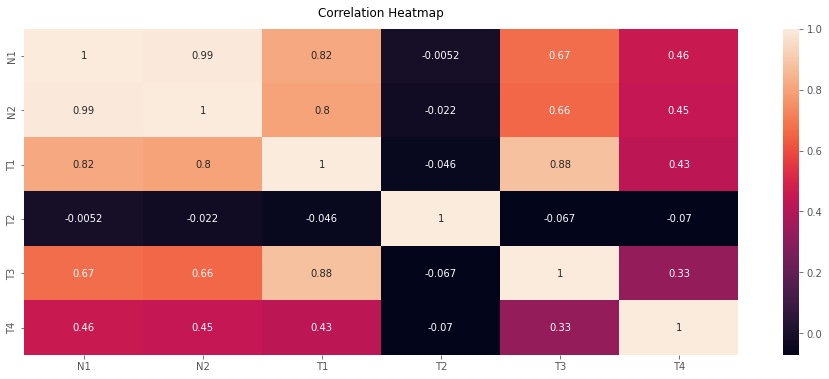

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(temp_df_2[temp_df_2.columns[1:7]].corr(), annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

###Part 2

####Define Function and import packages

In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime
def export_excel(df=pd.DataFrame(), excel_name='', sheet_name="Original_Data"):
  if excel_name == '':
    excel_name = str(datetime.now().hour) +'_' + str(datetime.now().minute) +'_' +str(datetime.now().second)

  writer = pd.ExcelWriter(f'{excel_name}.xlsx', engine='xlsxwriter')
  df.to_excel(excel_writer=writer, index=False, sheet_name=sheet_name)
  return writer.save()

In [ ]:
class MinMaxScale():

  def __init__(self, min=0, max=1, show=True):
    if min > max:
      temp = min
      min = max
      max = temp

    self.__min = min
    self.__max = max
    if show:
      self.print_min_max()

  def set_min(self, min):
    self.__min = min
    self.print_min_max()

  def set_max(self, max):
    self.__max = max
    self.print_min_max()

  def cal(self, x):
    if (self.__max - self.__min) == 0:
      x_scaled = (x - self.__min)
    else:
      x_scaled = (x - self.__min)/(self.__max - self.__min)
    return x_scaled

  def print_min_max(self):
    print(f"min:{self.__min}, max:{self.__max}")

  def __str__(self):
    return f"min:{self.__min}, max:{self.__max}"

In [ ]:
def scale_by_MinMax(x, r):
  scaler = MinMax_array[r.name]
  return scaler.cal(x)


def trade_off_2(value, r):
  if value > r['trade_off_upper'] or value < r['trade_off_lower']:
    return "H"
  # elif r['mean'] < value <= r['trade_off']:
  #   return "N2"
  else:
    return "N"


####import dataset

In [ ]:
df_process_2 = df_ori.copy()
df_process_2

,Geneid,N1,N2,T1,T2,T3,T4
0,A1BG,7,12,35,22,41,46
1,A1BG-AS1,0,0,7,0,4,5
2,A1CF,1,21,43,16,37,32
3,A2M,10,10,43,312,51,56
4,A2M-AS1,0,0,4,0,5,4
...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61
28022,ZYG11B,1,362,90,416,135,99
28023,ZYX,24,0,18,40,2,40
28024,ZZEF1,72,65,121,68,98,190


####Create each row's MinMaxScaler

In [ ]:
MinMax_array = {}
for index in df_process_2.index:
  MinMax_array[index] = MinMaxScale(df_process_2.iloc[index]['N1'], df_process_2.iloc[index]['N2'], show=False)

print(len(MinMax_array))

28026


In [ ]:
print(MinMax_array[28021].cal(400))

33.0


####Scale each row by it own MinMaxScaler

#####hidden

In [ ]:
df_process_2.columns[1:7]

Index(['N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
for col in df_process_2.columns[1:7]:
  df_process_2[col] = df_process_2.apply(lambda r: scale_by_MinMax(x=r[col], r=r), axis=1)
df_process_2

,Geneid,N1,N2,T1,T2,T3,T4
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000
...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143


In [ ]:
df_process_2[['T1', 'T2', 'T3', 'T4']]

,T1,T2,T3,T4
0,5.600000,3.000000,6.800000,7.800000
1,7.000000,0.000000,4.000000,5.000000
2,2.100000,0.750000,1.800000,1.550000
3,33.000000,302.000000,41.000000,46.000000
4,4.000000,0.000000,5.000000,4.000000
...,...,...,...,...
28021,0.181818,0.727273,1.818182,2.181818
28022,0.246537,1.149584,0.371191,0.271468
28023,0.750000,1.666667,0.083333,1.666667
28024,8.000000,0.428571,4.714286,17.857143


In [ ]:
df_process_2['mean_T1toT4'] = df_process_2[['T1', 'T2', 'T3', 'T4']].mean(axis=1)
df_process_2

,Geneid,N1,N2,T1,T2,T3,T4,mean_T1toT4
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000,5.800000
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000,4.000000
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000,1.550000
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,105.500000
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000,3.250000
...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818,1.227273
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468,0.509695
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667,1.041667
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143,7.750000


In [ ]:
df_process_2['SD_T1toT4'] = df_process_2[['T1', 'T2', 'T3', 'T4']].std(axis=1)
df_process_2

,Geneid,N1,N2,T1,T2,T3,T4,mean_T1toT4,SD_T1toT4
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000,5.800000,2.072036
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000,4.000000,2.943920
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000,1.550000,0.578792
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,105.500000,131.109369
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000,3.250000,2.217356
...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818,1.227273,0.931541
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468,0.509695,0.429979
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667,1.041667,0.771302
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143,7.750000,7.417001


#####important

In [ ]:
df_process_2

,Geneid,N1,N2,T1,T2,T3,T4,mean_T1toT4,SD_T1toT4
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000,5.800000,2.072036
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000,4.000000,2.943920
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000,1.550000,0.578792
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,105.500000,131.109369
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000,3.250000,2.217356
...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818,1.227273,0.931541
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468,0.509695,0.429979
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667,1.041667,0.771302
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143,7.750000,7.417001


In [ ]:
df_process_2.describe()

,N1,N2,T1,T2,T3,T4,mean_T1toT4,SD_T1toT4
count,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000
mean,0.295761,0.369621,4.180272,4.426542,3.266187,6.072506,4.486377,3.546995
std,0.456392,0.482711,8.981340,23.367849,7.886622,13.885831,9.990218,12.232134
min,0.000000,0.000000,-84.000000,-48.000000,-77.000000,-53.000000,-50.000000,0.000000
25%,0.000000,0.000000,0.235294,0.000000,0.071429,0.514286,0.500000,0.443471
50%,0.000000,0.000000,1.000000,0.706782,1.000000,1.634146,1.343750,1.040731
75%,1.000000,1.000000,4.000000,3.000000,3.000000,5.666667,4.250000,3.500000
max,1.000000,1.000000,134.000000,1668.000000,166.000000,716.000000,419.250000,832.503604


####trade off

In [ ]:
temp_sd = 0.86

df_process_2['trade_off_lower'] = df_process_2['mean_T1toT4'] - temp_sd*df_process_2['SD_T1toT4']
df_process_2['trade_off_upper'] = df_process_2['mean_T1toT4'] + temp_sd*df_process_2['SD_T1toT4']

#####hidden

In [ ]:
temp_df_2 = df_process_2.copy()
temp_df_2.columns[3:7]

Index(['T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
for col in temp_df_2.columns[3:7]:
  temp_df_2[col].astype(float)
  temp_df_2[col] = temp_df_2.apply(lambda r: trade_off_2(r[col], r), axis=1)

temp_df_2

,Geneid,N1,N2,T1,T2,T3,T4,mean_T1toT4,SD_T1toT4,trade_off_lower,trade_off_upper
0,A1BG,0.0,1.0,N,H,N,H,5.800000,2.072036,4.018049,7.581951
1,A1BG-AS1,0.0,0.0,H,H,N,N,4.000000,2.943920,1.468229,6.531771
2,A1CF,0.0,1.0,H,H,N,N,1.550000,0.578792,1.052239,2.047761
3,A2M,0.0,0.0,N,H,N,N,105.500000,131.109369,-7.254057,218.254057
4,A2M-AS1,0.0,0.0,N,H,N,N,3.250000,2.217356,1.343074,5.156926
...,...,...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,H,N,N,H,1.227273,0.931541,0.426147,2.028398
28022,ZYG11B,0.0,1.0,N,H,N,N,0.509695,0.429979,0.139913,0.879477
28023,ZYX,1.0,0.0,N,N,H,N,1.041667,0.771302,0.378347,1.704987
28024,ZZEF1,1.0,0.0,N,H,N,H,7.750000,7.417001,1.371379,14.128621


#####Important

In [ ]:
temp_df_2

,Geneid,N1,N2,T1,T2,T3,T4,mean_T1toT4,SD_T1toT4,trade_off_lower,trade_off_upper
0,A1BG,0.0,1.0,N,H,N,H,5.800000,2.072036,4.018049,7.581951
1,A1BG-AS1,0.0,0.0,H,H,N,N,4.000000,2.943920,1.468229,6.531771
2,A1CF,0.0,1.0,H,H,N,N,1.550000,0.578792,1.052239,2.047761
3,A2M,0.0,0.0,N,H,N,N,105.500000,131.109369,-7.254057,218.254057
4,A2M-AS1,0.0,0.0,N,H,N,N,3.250000,2.217356,1.343074,5.156926
...,...,...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,H,N,N,H,1.227273,0.931541,0.426147,2.028398
28022,ZYG11B,0.0,1.0,N,H,N,N,0.509695,0.429979,0.139913,0.879477
28023,ZYX,1.0,0.0,N,N,H,N,1.041667,0.771302,0.378347,1.704987
28024,ZZEF1,1.0,0.0,N,H,N,H,7.750000,7.417001,1.371379,14.128621


In [ ]:
temp_df_2.columns[3:7]

Index(['T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
temp_df_concat_2 = pd.DataFrame()

for col in temp_df_2.columns[3:7]:
  temp_df_2_temp = temp_df_2[[col]].value_counts().to_frame()
  temp_df_2_temp.columns = [col]
  temp_df_concat_2 = pd.concat([temp_df_concat_2, temp_df_2_temp], axis=1)
  temp_df_concat_2.fillna(0, inplace=True)
  temp_df_concat_2 = temp_df_concat_2.astype(int)
temp_df_concat_2

,T1,T2,T3,T4
H,7284,14201,9588,13062
N,20742,13825,18438,14964


In [ ]:
chi2_test(df=temp_df_concat_2)

dof=3

probability=0.950, critical=7.815, stat=4528.701
Dependent (reject H0)

significance=0.050, p=0.000
Dependent (reject H0)


####Find genes that ve the same trait

In [ ]:
temp_df_2_for_show = temp_df_2[(temp_df_2['T1'] == "H") &
          (temp_df_2['T2'] == "H") &
          (temp_df_2['T3'] == "H") &
          (temp_df_2['T4'] == "H")
          ].copy()
temp_df_2_for_show

,Geneid,N1,N2,T1,T2,T3,T4,mean_T1toT4,SD_T1toT4,trade_off_lower,trade_off_upper
103,ABHD13,0.0,0.0,H,H,H,H,1.50,1.732051,0.010436,2.989564
206,ACP6_1,0.0,0.0,H,H,H,H,1.00,1.154701,0.006958,1.993042
234,ACTBL2,0.0,0.0,H,H,H,H,2.50,2.886751,0.017394,4.982606
473,AFF2_1,0.0,0.0,H,H,H,H,2.50,1.732051,1.010436,3.989564
556,AIF1_2,0.0,0.0,H,H,H,H,0.50,0.577350,0.003479,0.996521
...,...,...,...,...,...,...,...,...,...,...,...
27918,ZNF84,0.0,1.0,H,H,H,H,0.50,0.577350,0.003479,0.996521
27925,ZNF84-DT,0.0,1.0,H,H,H,H,0.25,0.288675,0.001739,0.498261
27942,ZNF90,0.0,1.0,H,H,H,H,1.00,1.154701,0.006958,1.993042
27945,ZNF93,0.0,0.0,H,H,H,H,9.50,6.350853,4.038266,14.961734


In [ ]:
temp_df_2_for_show.index[:10]

Int64Index([103, 206, 234, 473, 556, 610, 746, 926, 1156, 1166], dtype='int64')

In [ ]:
temp_df_2_for_show.columns[1:7]

Index(['N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
temp_df = df_ori.iloc[temp_df_2_for_show.index][temp_df_2_for_show.columns[1:7]]
temp_df

,N1,N2,T1,T2,T3,T4
103,0,0,0,0,3,3
206,0,0,2,0,2,0
234,0,0,5,0,0,5
473,0,0,4,1,4,1
556,0,0,1,1,0,0
...,...,...,...,...,...,...
27918,0,1,0,1,1,0
27925,0,2,0,1,1,0
27942,0,1,0,0,2,2
27945,0,0,15,4,4,15


In [ ]:
temp_df_2 = df_process_2.iloc[temp_df_2_for_show.index][temp_df_2_for_show.columns[1:7]]
temp_df_2

,N1,N2,T1,T2,T3,T4
103,0.0,0.0,0.0,0.0,3.0,3.0
206,0.0,0.0,2.0,0.0,2.0,0.0
234,0.0,0.0,5.0,0.0,0.0,5.0
473,0.0,0.0,4.0,1.0,4.0,1.0
556,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
27918,0.0,1.0,0.0,1.0,1.0,0.0
27925,0.0,1.0,0.0,0.5,0.5,0.0
27942,0.0,1.0,0.0,0.0,2.0,2.0
27945,0.0,0.0,15.0,4.0,4.0,15.0


In [ ]:
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(temp_df.corr(), dtype=np.bool))
# heatmap = sns.heatmap(temp_df.corr(), mask=mask, annot=True)
# heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

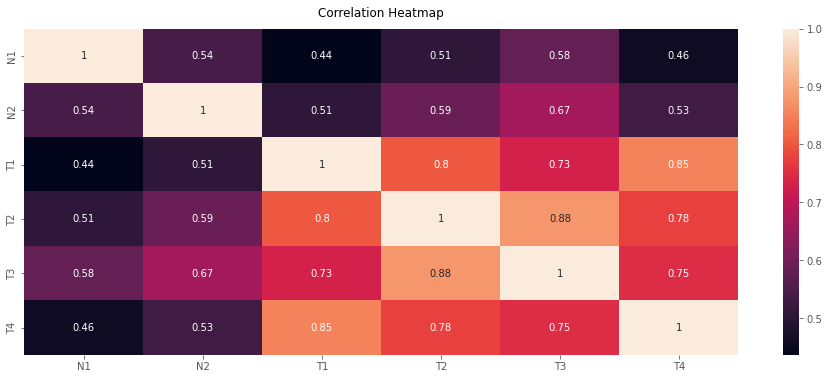

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(temp_df.corr(), annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

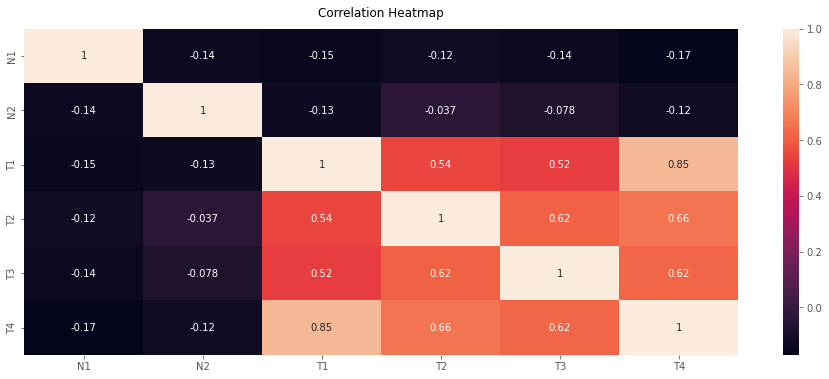

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(temp_df_2.corr(), annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

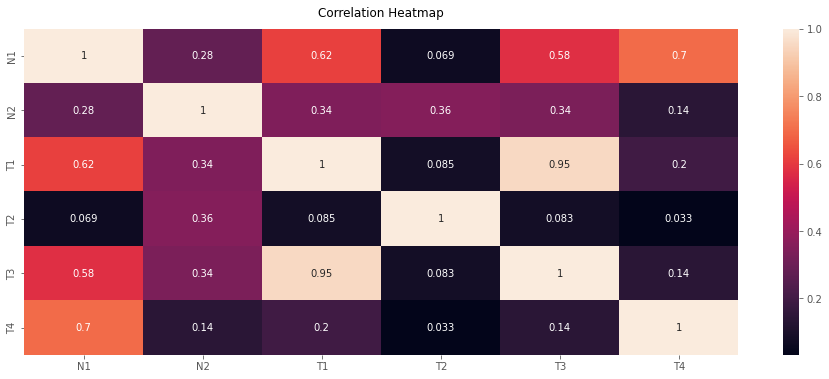

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_ori[['N1', 'N2', 'T1', 'T2', 'T3', 'T4']].corr(), annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#####Export result

In [ ]:
export_excel(df=temp_df_2_for_show, excel_name="Method 3 outcome")

In [ ]:
temp_df = pd.DataFrame()
temp_df['Geneid'] = temp_df_2_for_show[['Geneid']].copy()
temp_df

,Geneid
103,ABHD13
206,ACP6_1
234,ACTBL2
473,AFF2_1
556,AIF1_2
...,...
27918,ZNF84
27925,ZNF84-DT
27942,ZNF90
27945,ZNF93


In [ ]:
json_file = "/content/drive/MyDrive/智慧醫療/Final_Report/Datasets/ENSG_to_GeneID.json"

In [ ]:
import json

In [ ]:
with open(json_file) as d:
    Gene_Dict = json.load(d)
len(Gene_Dict)

41737

In [ ]:
Gene_Dict_2 = dict((v, k) for k, v in Gene_Dict.items())

In [ ]:
def find_ENSG(r):
  if r['Geneid'] in Gene_Dict_2:
    return Gene_Dict_2[r['Geneid']]
  else:
    return "(None)"

In [ ]:
temp_df['convert'] = temp_df.apply(find_ENSG, axis=1)
temp_df.head(10)

,Geneid,convert
103,ABHD13,ENSG00000139826
206,ACP6_1,(None)
234,ACTBL2,ENSG00000169067
473,AFF2_1,(None)
556,AIF1_2,(None)
610,AKR1C4_1,(None)
746,AMZ2_1,(None)
926,AOC1,ENSG00000002726
1156,ARHGEF38-IT1,ENSG00000249885
1166,ARHGEF9_1,(None)


In [ ]:
temp_df[temp_df['convert'] == "(None)"]

,Geneid,convert
206,ACP6_1,(None)
473,AFF2_1,(None)
556,AIF1_2,(None)
610,AKR1C4_1,(None)
746,AMZ2_1,(None)
...,...,...
26632,VARS2_4,(None)
27112,ZBED1_1,(None)
27670,ZNF558_1,(None)
27824,ZNF716_1,(None)


In [ ]:
temp_df = temp_df[temp_df['convert'] != "(None)"].copy()
temp_df

,Geneid,convert
103,ABHD13,ENSG00000139826
234,ACTBL2,ENSG00000169067
926,AOC1,ENSG00000002726
1156,ARHGEF38-IT1,ENSG00000249885
1320,ASF1A,ENSG00000111875
...,...,...
27740,ZNF626,ENSG00000188171
27918,ZNF84,ENSG00000198040
27925,ZNF84-DT,ENSG00000246394
27942,ZNF90,ENSG00000213988


In [ ]:
export_excel(df=temp_df, excel_name="Method 3 outcome with ENSG")

In [ ]:
# temp_df_2_for_show = temp_df_2_for_show[temp_df_2_for_show['mean_T1toT4']> df_process_2.describe()['mean_T1toT4']['mean']]
# temp_df_2_for_show #method 3 final result

In [ ]:
# temp_df_2_for_show= temp_df_2_for_show[temp_df_2_for_show['SD_T1toT4']< df_process_2.describe()['SD_T1toT4']['mean']]
# temp_df_2_for_show

In [ ]:
# df_ori.loc[temp_df_2_for_show.index]

###Part 3

####Define function and install packages

In [ ]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('gist_rainbow')

max_colors = 31   # Constant, max mumber of series in any plot.  Ideally prime.
color_number = 0  # Variable, incremented for each series.

def restart_colors():
    global color_number
    color_number = 0
    #np.random.seed(1)

def next_color():
    global color_number
    color_number += 1
    #color = tuple(np.random.uniform(0.0, 0.5, 3))
    color = cmap( ((5 * color_number) % max_colors) / max_colors )
    return color

def get_color(x):
  color = cmap( ((20 * x) % max_colors) / max_colors )
  return color

def plot_args(x=0):  # Invoked for each plot in a series as: '**(plot_args())'
    # mkr = next_color()
    # clr = (1 - mkr[0], 1 - mkr[1], 1 - mkr[2], mkr[3])  # Give line inverse of marker color
    # return {
    #     "marker": "o",
    #     "color": clr,
    #     "mfc": mkr,
    #     "mec": mkr,
    #     "markersize": 0.5,
    #     "linewidth": 1,
    # }

    mkr = get_color(x)
    clr = (1 - mkr[0], 1 - mkr[1], 1 - mkr[2], mkr[3])  # Give line inverse of marker color
    return {
        "marker": "o",
        "color": clr,
    }

In [ ]:
# df_tmeter.plot(ax=axs, x="Timestamp", y=s, label="T-meter:%s" % s, **(plot_args()))

In [ ]:
# def plot_DBSCAN(array_list):
#   for point in array_list:
#     if point[2] == -1:
#       c0 = plt.scatter(x=point[0], y=point[1], c='b', marker='x')
#     elif point[2] == 0:
#       c1 = plt.scatter(x=point[0], y=point[1], c='r', marker='+')
#     elif point[2] == 1:
#       c2 = plt.scatter(x=point[0], y=point[1], c='g', marker='o')
#     else:
#       c3 = plt.scatter(x=point[0], y=point[1], c='y', marker='.')

#   plt.legend([c0,c1,c2,c3], ["outlier", 'cluster1', 'cluster2', 'cluster3'])

def plot_DBSCAN(array_list):
  scatter_list = {}
  for point in array_list:
    temp_scatter = plt.scatter(point[0], point[1], label=point[2], **(plot_args(point[2])))
    if point[2] not in scatter_list:
      scatter_list[point[2]] = temp_scatter

  text = 'cluster_'
  cluster_array = []
  for item in scatter_list:
    if str(item) == '-1.0':
      cluster_array.append("outlier")
    else:
      cluster_array.append(text + str(item))

  scatter_ = [scatter_list[i] for i in scatter_list]

  plt.legend(scatter_, cluster_array)
  plt.show()

In [ ]:
def plot_pca(pca=PCA(), figsize=(25,25)):
  plt.figure(figsize=figsize)
  # fig, ax = plt.subplots()
  y = np.cumsum(pca.explained_variance_ratio_)
  range_num = len(y)+1
  xi = np.arange(1, range_num, step=1)
  print(xi)
  print(y)
  plt.ylim(0.0,1.1)
  plt.plot(xi, y, marker='o', linestyle='--', color='b')
  plt.xlabel('Number of Components')
  plt.xticks(np.arange(0, range_num+1, step=1)) #change from 0-based array index to 1-based human-readable label
  plt.ylabel('Cumulative variance (%)')
  plt.title('The number of components needed to explain variance')

  plt.axhline(y=0.95, color='r', linestyle='-')
  plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

  # ax.grid(axis='x')
  plt.show()

  return(pd.DataFrame([y], columns=xi))

####Remove supect genes

In [ ]:
df_process_3_2 = df_ori.copy()
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4
0,A1BG,7,12,35,22,41,46
1,A1BG-AS1,0,0,7,0,4,5
2,A1CF,1,21,43,16,37,32
3,A2M,10,10,43,312,51,56
4,A2M-AS1,0,0,4,0,5,4
...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61
28022,ZYG11B,1,362,90,416,135,99
28023,ZYX,24,0,18,40,2,40
28024,ZZEF1,72,65,121,68,98,190


In [ ]:
df_process_3_2['diff_N1nN2_byScale'] = df_process_3_2.apply(diff_N1nN2_byScale, axis=1)
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale
0,A1BG,7,12,35,22,41,46,1.714286
1,A1BG-AS1,0,0,7,0,4,5,0.000000
2,A1CF,1,21,43,16,37,32,21.000000
3,A2M,10,10,43,312,51,56,1.000000
4,A2M-AS1,0,0,4,0,5,4,0.000000
...,...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61,1.297297
28022,ZYG11B,1,362,90,416,135,99,362.000000
28023,ZYX,24,0,18,40,2,40,24.000000
28024,ZZEF1,72,65,121,68,98,190,1.107692


In [ ]:
df_process_3_2['diff_N1nN2'] = abs(df_process_3_2['N1'] - df_process_3_2['N2'])
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
2,A1CF,1,21,43,16,37,32,21.000000,20
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,37,48,39,45,57,61,1.297297,11
28022,ZYG11B,1,362,90,416,135,99,362.000000,361
28023,ZYX,24,0,18,40,2,40,24.000000,24
28024,ZZEF1,72,65,121,68,98,190,1.107692,7


In [ ]:
df_process_3_2.describe()

,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
count,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000
mean,18.046849,26.375009,27.834190,53.482516,26.949012,46.020659,11.375524,25.954364
std,63.183212,165.972202,67.068825,746.548294,95.228727,1041.508054,81.496408,158.408316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,1.000000,2.000000,7.000000,0.000000,0.000000
50%,0.000000,4.000000,16.000000,12.000000,13.000000,22.000000,2.000000,9.000000
75%,27.000000,25.000000,39.000000,36.000000,37.000000,49.000000,11.666667,28.000000
max,6473.000000,11743.000000,9465.000000,105727.000000,14654.000000,145957.000000,10636.000000,11674.000000


choose mean as trade off value

In [ ]:
df_process_3_2[df_process_3_2['diff_N1nN2'] < 25.954364]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
2,A1CF,1,21,43,16,37,32,21.000000,20
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
...,...,...,...,...,...,...,...,...,...
28019,ZXDB,0,0,15,5,2,22,0.000000,0
28020,ZXDC,26,14,18,9,15,42,1.857143,12
28021,ZYG11A,37,48,39,45,57,61,1.297297,11
28023,ZYX,24,0,18,40,2,40,24.000000,24


In [ ]:
df_process_3_2[df_process_3_2['diff_N1nN2_byScale'] < 11.375524]

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
5,A2ML1,119,45,131,50,100,75,2.644444,74
...,...,...,...,...,...,...,...,...,...
28019,ZXDB,0,0,15,5,2,22,0.000000,0
28020,ZXDC,26,14,18,9,15,42,1.857143,12
28021,ZYG11A,37,48,39,45,57,61,1.297297,11
28024,ZZEF1,72,65,121,68,98,190,1.107692,7


In [ ]:
# trade_off_value_1 = df_process_3_2['diff_N1&N2'].describe()['mean']
# trade_off_value_1

In [ ]:
# df_process_3_2 = df_process_3_2[df_process_3_2['diff_N1&N2'] < trade_off_value_1].copy()
# df_process_3_2

In [ ]:
df_process_3_2 = df_process_3_2[(df_process_3_2['diff_N1nN2_byScale'] < 11.375524) & (df_process_3_2['diff_N1nN2'] < 25.954364)].copy()
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4,diff_N1nN2_byScale,diff_N1nN2
0,A1BG,7,12,35,22,41,46,1.714286,5
1,A1BG-AS1,0,0,7,0,4,5,0.000000,0
3,A2M,10,10,43,312,51,56,1.000000,0
4,A2M-AS1,0,0,4,0,5,4,0.000000,0
7,A3GALT2,0,0,25,2,13,20,0.000000,0
...,...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,0.000000,0
28019,ZXDB,0,0,15,5,2,22,0.000000,0
28020,ZXDC,26,14,18,9,15,42,1.857143,12
28021,ZYG11A,37,48,39,45,57,61,1.297297,11


In [ ]:
# trade_off_value_1 = df_process_3_2['diff_N1&N2'].describe()['mean']

In [ ]:
df_process_3_2.drop(columns=['diff_N1nN2_byScale', 'diff_N1nN2'], inplace=True)
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4
0,A1BG,7,12,35,22,41,46
1,A1BG-AS1,0,0,7,0,4,5
3,A2M,10,10,43,312,51,56
4,A2M-AS1,0,0,4,0,5,4
7,A3GALT2,0,0,25,2,13,20
...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17
28019,ZXDB,0,0,15,5,2,22
28020,ZXDC,26,14,18,9,15,42
28021,ZYG11A,37,48,39,45,57,61


####DBSCAN

####Part 1
without normalization

#####unnecessary

In [ ]:
dbscan = cluster.DBSCAN(eps=70, min_samples=45)
dbscan.fit(df_process_3_2.drop(columns=['Geneid']))
np.unique(dbscan.labels_)

array([-1,  0])

In [ ]:
df_process_3_2['label'] = dbscan.labels_
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4,label
0,A1BG,7,12,35,22,41,46,0
1,A1BG-AS1,0,0,7,0,4,5,0
3,A2M,10,10,43,312,51,56,-1
4,A2M-AS1,0,0,4,0,5,4,0
7,A3GALT2,0,0,25,2,13,20,0
...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,0
28019,ZXDB,0,0,15,5,2,22,0
28020,ZXDC,26,14,18,9,15,42,0
28021,ZYG11A,37,48,39,45,57,61,0


In [ ]:
pd.DataFrame(df_process_3_2['label'].value_counts())

,label
0,17193
-1,185


In [ ]:
# count_values(df=df_process_3_2, col_list=['label'])

In [ ]:
df_process_3_2[df_process_3_2['label'] == -1]

,Geneid,N1,N2,T1,T2,T3,T4,label
3,A2M,10,10,43,312,51,56,-1
141,ACACB,115,105,189,201,150,207,-1
175,ACKR1,0,0,3,1668,0,6,-1
233,ACTB,50,54,41,585,41,253,-1
411,ADGRV1,175,191,220,205,190,155,-1
...,...,...,...,...,...,...,...,...
26747,VPS53,110,115,115,220,128,160,-1
26843,WDFY3,109,122,199,148,161,155,-1
27093,YWHAB,28,28,47,617,50,69,-1
27241,ZEB2,68,93,63,459,76,134,-1


In [ ]:
pca = PCA()
pca.fit(df_process_3_2.drop(columns=['Geneid', 'label']))
pca

PCA()

[1 2 3 4 5 6]
[0.94759192 0.98843012 0.99453947 0.99836361 0.99960625 1.        ]


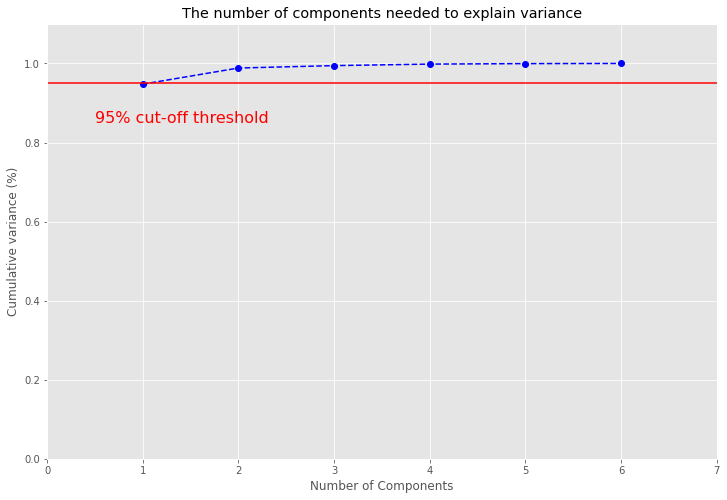

,1,2,3,4,5,6
0,0.947592,0.98843,0.994539,0.998364,0.999606,1.0


In [ ]:
plot_pca(pca=pca, figsize=(12,8))

In [ ]:
temp_df_5 = df_process_3_2.drop(columns=['Geneid', 'label'])

pca = PCA(n_components=2)
pca.fit(temp_df_5)
x_pca_a = pca.transform(temp_df_5)
print("original shape: ", temp_df_5.shape)
print("transformed shape: ", x_pca_a.shape)

original shape:  (17378, 6)
transformed shape:  (17378, 2)


In [ ]:
x_pca_a

array([[ -0.58221604,  30.79769588],
       [-23.8881318 , -30.04894095],
       [289.65973601,  39.28221412],
       ...,
       [-13.86502662,  15.21567389],
       [ 23.32657945,  68.69480617],
       [ 49.64516004, 221.87287035]])

In [ ]:
labels_list = [[i] for i in df_process_3_2['label'].to_list()]
labels_list[:10]

[[0], [0], [-1], [0], [0], [0], [0], [0], [0], [0]]

In [ ]:
data_to_draw = np.concatenate((x_pca_a, labels_list), axis=1)
data_to_draw[:10]

array([[ -0.58221604,  30.79769588,   0.        ],
       [-23.8881318 , -30.04894095,   0.        ],
       [289.65973601,  39.28221412,  -1.        ],
       [-23.92223806, -31.6217648 ,   0.        ],
       [-21.42823596,  -8.19158471,   0.        ],
       [  6.63400106,  -5.504732  ,   0.        ],
       [-24.02509669, -36.55269264,   0.        ],
       [ 34.30791565,  73.50502241,   0.        ],
       [ -4.53215753,  77.88286062,   0.        ],
       [ -0.60086616, -16.31819228,   0.        ]])

In [ ]:
temp_df = pd.DataFrame(data_to_draw)
temp_df.columns = ['x', 'y', 'label']
temp_df

,x,y,label
0,-0.582216,30.797696,0.0
1,-23.888132,-30.048941,0.0
2,289.659736,39.282214,-1.0
3,-23.922238,-31.621765,0.0
4,-21.428236,-8.191585,0.0
...,...,...,...
17373,-15.550480,-14.275798,0.0
17374,-18.602519,-16.621945,0.0
17375,-13.865027,15.215674,0.0
17376,23.326579,68.694806,0.0


In [ ]:
def plot_DBSCAN_2(array_list):
  for point in array_list:
    if point[2] == -1:
      c0 = plt.scatter(x=point[0], y=point[1], c='b', marker='x')
    elif point[2] == 0:
      c1 = plt.scatter(x=point[0], y=point[1], c='r', marker='+')
    # elif point[2] == 1:
    #   c2 = plt.scatter(x=point[0], y=point[1], c='g', marker='o')
    # else:
    #   c3 = plt.scatter(x=point[0], y=point[1], c='y', marker='.')

  # plt.legend([c0,c1,c2,c3], ["outlier", 'cluster1', 'cluster2', 'cluster3'])
  plt.legend([c0,c1], ["outlier", 'cluster1'])

In [ ]:
# plt.figure(figsize=(25,25))
# plot_DBSCAN_2(data_to_draw[10000:12500])

In [ ]:
# plt.figure(figsize=(25,25)) #(eps=40, min_samples=45)
# plot_DBSCAN_2(data_to_draw)

#####Important

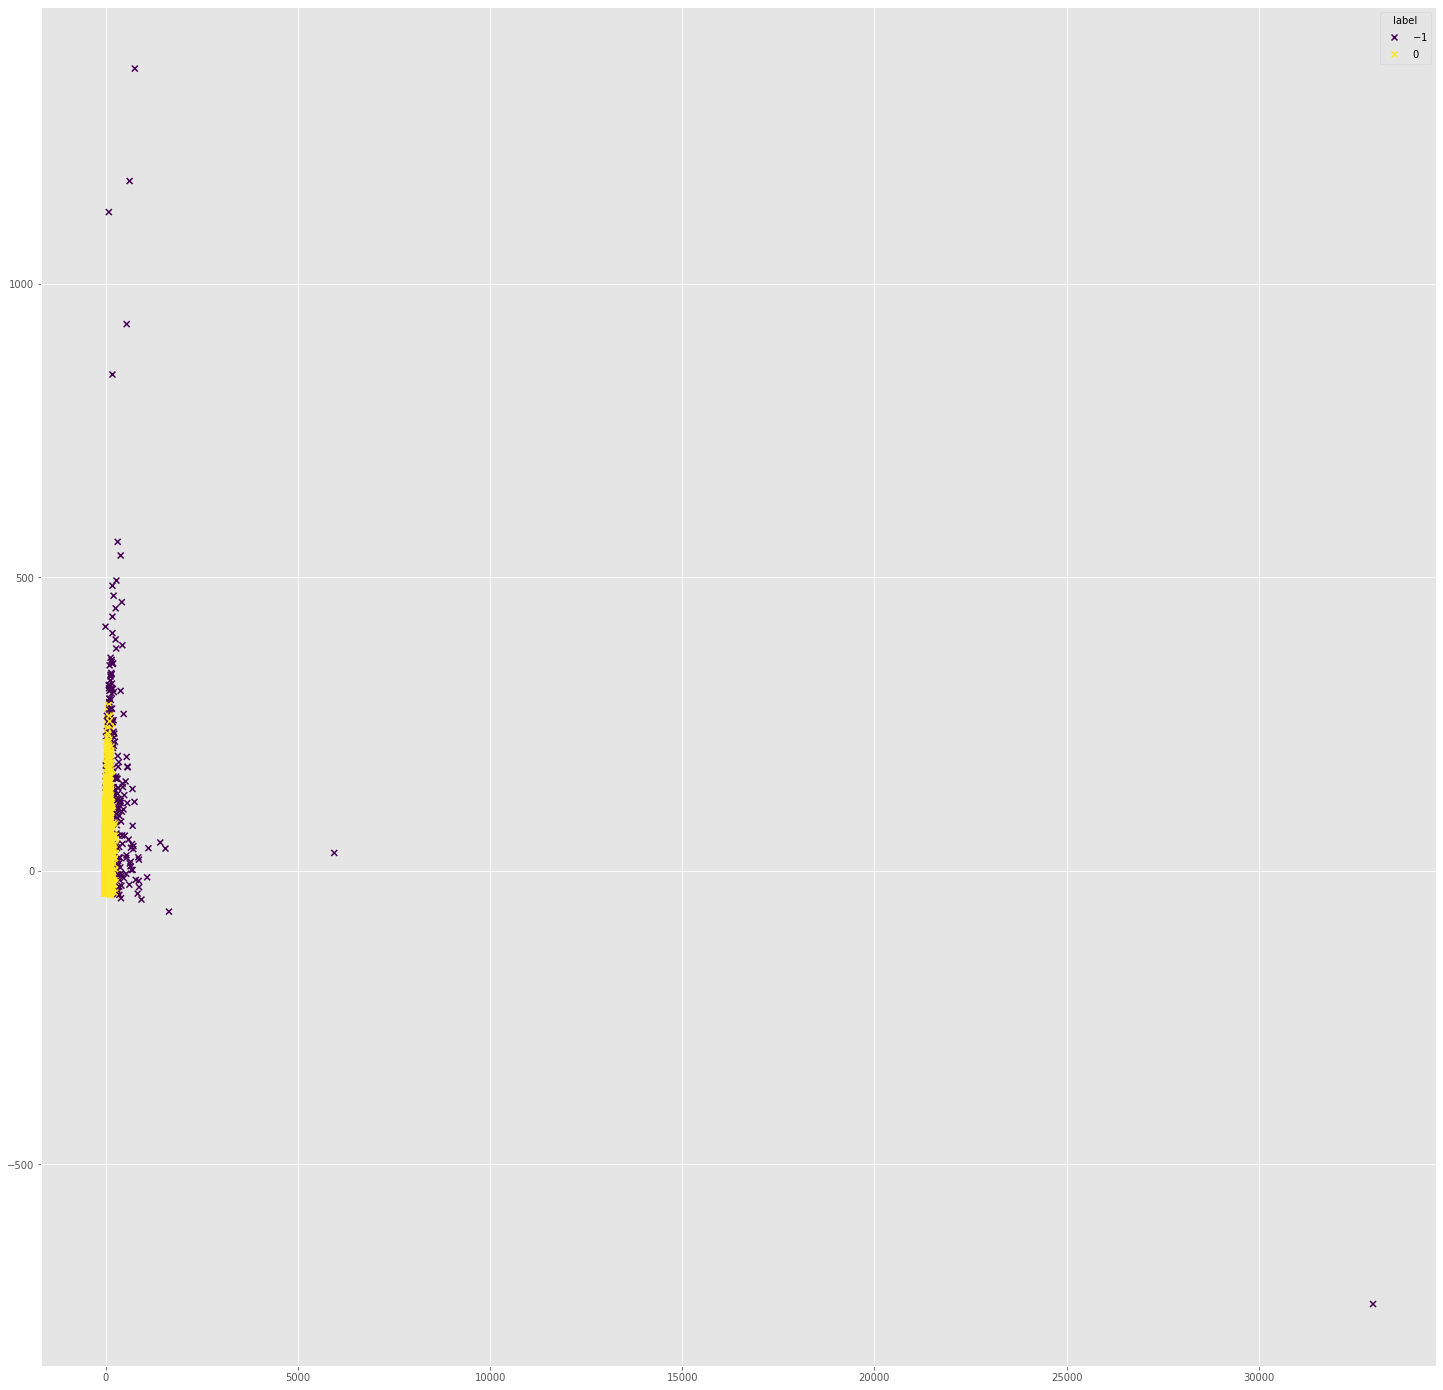

In [ ]:
plt.figure(figsize=(25,25))
plt.style.use("ggplot")
scatter = plt.scatter(temp_df['x'],temp_df['y'],c = temp_df['label'], marker='x')
plt.legend(*scatter.legend_elements(), title="label")
plt.show()

####Part 1.2
with normalization

#####unnecessary

In [ ]:
df_process_2_2 = df_process_2.copy()
df_process_2_2

,Geneid,N1,N2,T1,T2,T3,T4,mean_T1toT4,SD_T1toT4,trade_off_lower,trade_off_upper
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000,5.800000,2.072036,4.018049,7.581951
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000,4.000000,2.943920,1.468229,6.531771
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000,1.550000,0.578792,1.052239,2.047761
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,105.500000,131.109369,-7.254057,218.254057
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000,3.250000,2.217356,1.343074,5.156926
...,...,...,...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818,1.227273,0.931541,0.426147,2.028398
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468,0.509695,0.429979,0.139913,0.879477
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667,1.041667,0.771302,0.378347,1.704987
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143,7.750000,7.417001,1.371379,14.128621


In [ ]:
df_process_2_2.columns[:7]

Index(['Geneid', 'N1', 'N2', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [ ]:
df_process_2_2 = df_process_2_2[df_process_2_2.columns[:7]].copy()
df_process_2_2

,Geneid,N1,N2,T1,T2,T3,T4
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000
...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143


In [ ]:
dbscan = cluster.DBSCAN(eps=70, min_samples=45)
dbscan.fit(df_process_2_2.drop(columns=['Geneid']))
np.unique(dbscan.labels_)

array([-1,  0])

In [ ]:
df_process_2_2['label'] = dbscan.labels_
df_process_2_2

,Geneid,N1,N2,T1,T2,T3,T4,label
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000,0
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000,0
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000,0
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,-1
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000,0
...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818,0
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468,0
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667,0
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143,0


In [ ]:
count_values(df=df_process_2_2, col_list=['label'])

,label
label,
0,27992
-1,34


In [ ]:
df_process_2_2[df_process_2_2['label'] == -1]

,Geneid,N1,N2,T1,T2,T3,T4,label
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,-1
175,ACKR1,0.0,0.0,3.000000,1668.000000,0.000000,6.000000,-1
2287,C3,1.0,0.0,8.833333,495.500000,2.833333,11.666667,-1
2413,C9orf16,0.0,0.0,13.000000,338.000000,0.000000,5.000000,-1
2570,CAP1,1.0,0.0,29.000000,9.000000,16.000000,252.000000,-1
3981,COL6A3,1.0,0.0,-40.000000,272.000000,-55.000000,-28.000000,-1
4899,DEPP1,0.0,0.0,0.000000,314.000000,10.000000,1.000000,-1
5546,EEF2,1.0,0.0,-47.000000,191.000000,-77.000000,610.000000,-1
6793,FLRT2,0.0,1.0,98.000000,192.000000,166.000000,29.000000,-1
6851,FOS,0.0,1.0,-2.250000,268.750000,1.750000,-0.250000,-1


In [ ]:
pca = PCA()
pca.fit(df_process_2_2.drop(columns=['Geneid', 'label']))
pca

PCA()

[1 2 3 4 5 6]
[0.65309652 0.92443743 0.98236566 0.99951581 0.99989021 1.        ]


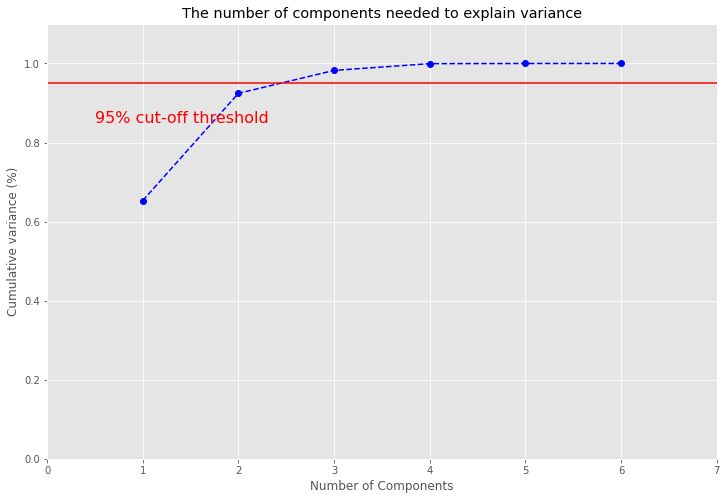

,1,2,3,4,5,6
0,0.653097,0.924437,0.982366,0.999516,0.99989,1.0


In [ ]:
plot_pca(pca=pca, figsize=(12,8))

In [ ]:
temp_df_5 = df_process_2_2.drop(columns=['Geneid', 'label'])

pca = PCA(n_components=2)
pca.fit(temp_df_5)
x_pca_a = pca.transform(temp_df_5)
print("original shape: ", temp_df_5.shape)
print("transformed shape: ", x_pca_a.shape)

original shape:  (28026, 6)
transformed shape:  (28026, 2)


In [ ]:
x_pca_a

array([[-0.36988443,  3.59283057],
       [-3.99797687,  2.00911998],
       [-5.04748294, -3.82038493],
       ...,
       [-4.5202515 , -5.19098771],
       [-0.28746093, 12.48554588],
       [-6.61495003, -5.47860318]])

In [ ]:
labels_list = [[i] for i in df_process_2_2['label'].to_list()]
labels_list[:10]

[[0], [0], [0], [-1], [0], [0], [0], [0], [0], [0]]

In [ ]:
data_to_draw = np.concatenate((x_pca_a, labels_list), axis=1)
data_to_draw[:10]

array([[-3.69884435e-01,  3.59283057e+00,  0.00000000e+00],
       [-3.99797687e+00,  2.00911998e+00,  0.00000000e+00],
       [-5.04748294e+00, -3.82038493e+00,  0.00000000e+00],
       [ 3.01676520e+02, -3.24222463e+01, -1.00000000e+00],
       [-4.56278291e+00,  2.35431086e-01,  0.00000000e+00],
       [-6.21984165e+00, -5.27756412e+00,  0.00000000e+00],
       [-6.18497593e+00, -5.99847404e+00,  0.00000000e+00],
       [ 5.04460762e+00,  2.40920395e+01,  0.00000000e+00],
       [ 3.35514131e+01,  2.15870298e+01,  0.00000000e+00],
       [-5.18741621e+00, -4.24715232e+00,  0.00000000e+00]])

In [ ]:
# plt.figure(figsize=(25,25))
# plot_DBSCAN(data_to_draw[10000:])

In [ ]:
# plt.figure(figsize=(25,25)) #(eps=40, min_samples=45)
# plot_DBSCAN(data_to_draw)

In [ ]:
# plt.figure(figsize=(25,25))
# plot_DBSCAN(data_to_draw)

In [ ]:
temp_df = pd.DataFrame(data_to_draw)
temp_df.columns = ['x', 'y', 'label']
temp_df

,x,y,label
0,-0.369884,3.592831,0.0
1,-3.997977,2.009120,0.0
2,-5.047483,-3.820385,0.0
3,301.676520,-32.422246,-1.0
4,-4.562783,0.235431,0.0
...,...,...,...
28021,-5.191062,-4.177991,0.0
28022,-5.390039,-6.240563,0.0
28023,-4.520251,-5.190988,0.0
28024,-0.287461,12.485546,0.0


#####Important

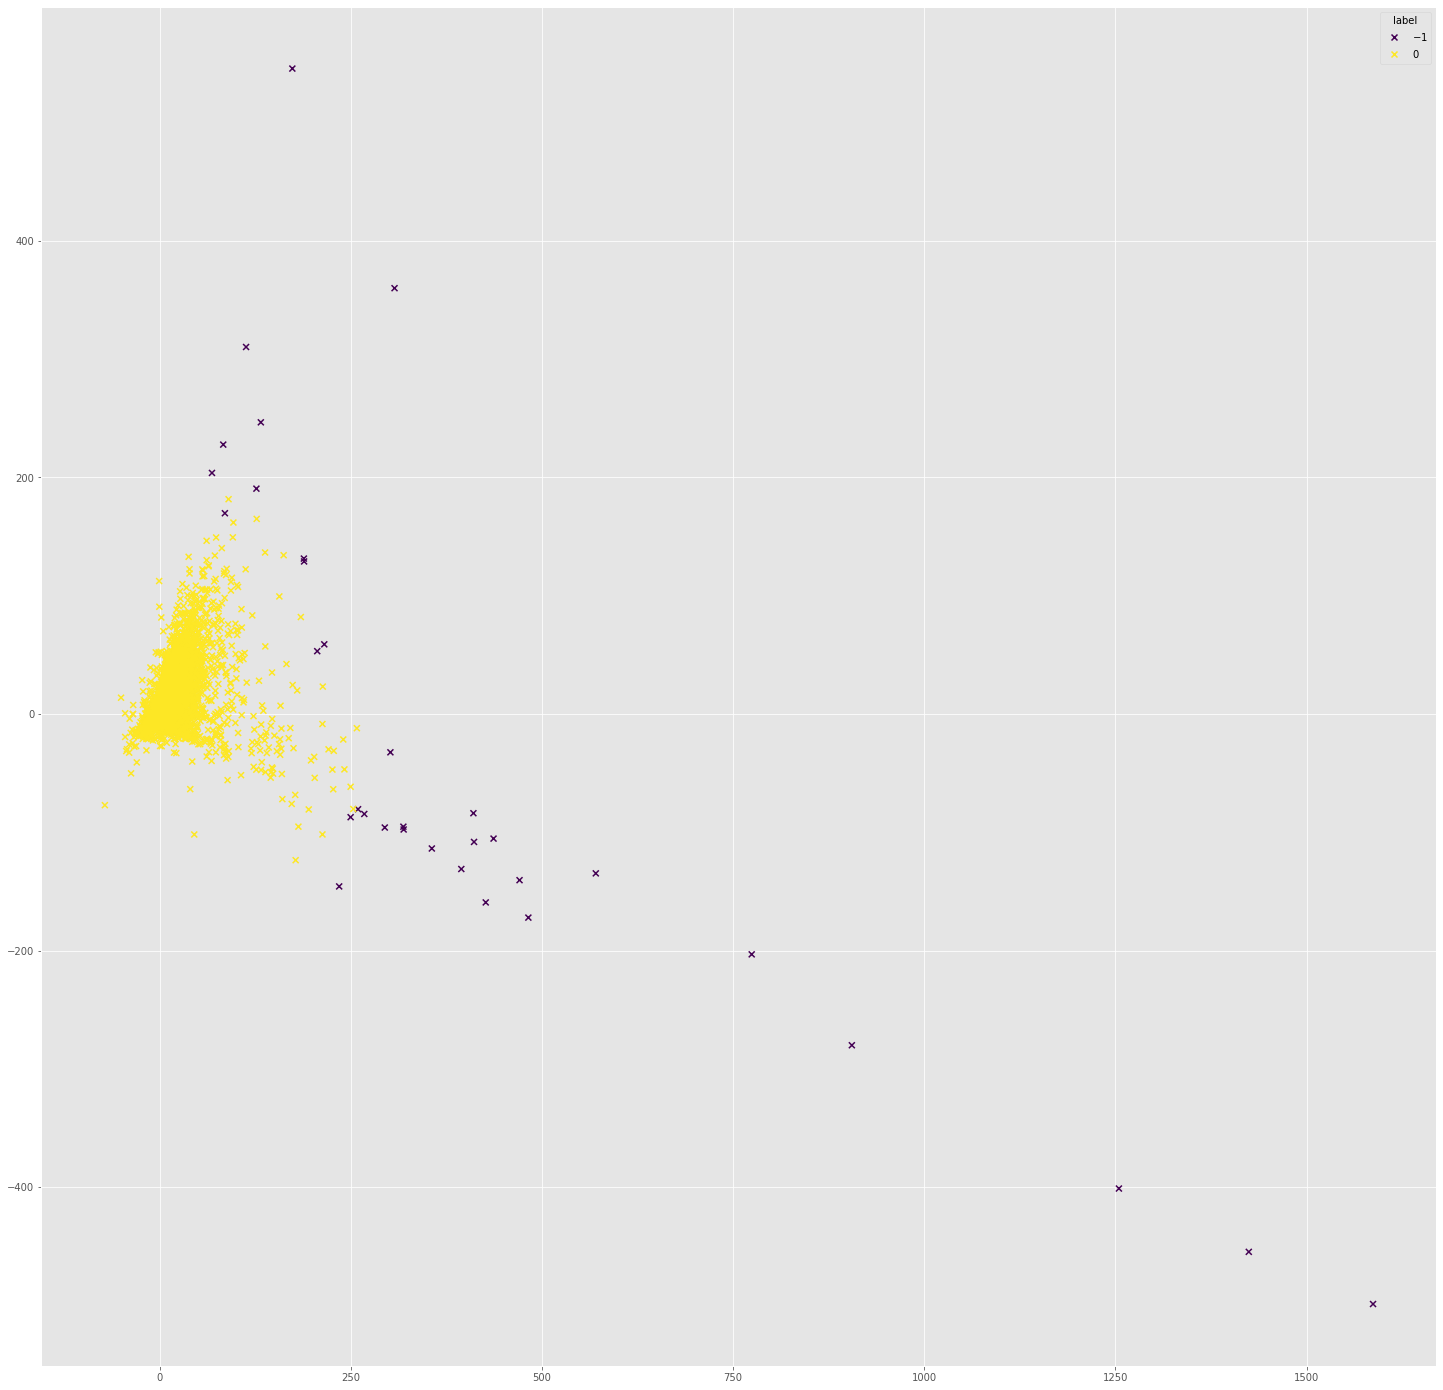

In [ ]:
plt.figure(figsize=(25,25))
plt.style.use("ggplot")
scatter = plt.scatter(temp_df['x'],temp_df['y'],c = temp_df['label'], marker='x')
plt.legend(*scatter.legend_elements(), title="label")
plt.show()

####K-means Part 1
without normalization

#####unnecessary

In [ ]:
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4,label
0,A1BG,7,12,35,22,41,46,0
1,A1BG-AS1,0,0,7,0,4,5,0
3,A2M,10,10,43,312,51,56,-1
4,A2M-AS1,0,0,4,0,5,4,0
7,A3GALT2,0,0,25,2,13,20,0
...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,0
28019,ZXDB,0,0,15,5,2,22,0
28020,ZXDC,26,14,18,9,15,42,0
28021,ZYG11A,37,48,39,45,57,61,0


In [ ]:
def get_score(k, df_data):
  km = cluster.KMeans(n_clusters=k)
  km.fit(df_data)
  return metrics.silhouette_score(df_data, km.labels_)

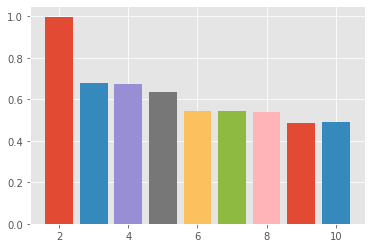

In [ ]:
for k in range(2, 11):
  plt.bar(k, get_score(k, df_process_3_2.drop(columns=['label', 'Geneid'])))

In [ ]:
km = cluster.KMeans(n_clusters=6)
km.fit(df_process_3_2.drop(columns=['label', 'Geneid']))

KMeans(n_clusters=6)

In [ ]:
km.labels_

array([0, 2, 5, ..., 0, 0, 5], dtype=int32)

In [ ]:
df_process_3_2['label'] = km.labels_
df_process_3_2

,Geneid,N1,N2,T1,T2,T3,T4,label
0,A1BG,7,12,35,22,41,46,0
1,A1BG-AS1,0,0,7,0,4,5,2
3,A2M,10,10,43,312,51,56,5
4,A2M-AS1,0,0,4,0,5,4,2
7,A3GALT2,0,0,25,2,13,20,2
...,...,...,...,...,...,...,...,...
28017,ZWINT,0,0,26,8,3,17,2
28019,ZXDB,0,0,15,5,2,22,2
28020,ZXDC,26,14,18,9,15,42,0
28021,ZYG11A,37,48,39,45,57,61,0


In [ ]:
df_process_3_2.columns[7]

'label'

In [ ]:
count_values(df=df_process_3_2, col_list=['label'])

,label
label,
2,12333
0,4041
5,933
4,69
1,1
3,1


In [ ]:
pca = PCA()
pca.fit(df_process_3_2.drop(columns=['Geneid', 'label']))
pca

PCA()

[1 2 3 4 5 6]
[0.94759192 0.98843012 0.99453947 0.99836361 0.99960625 1.        ]


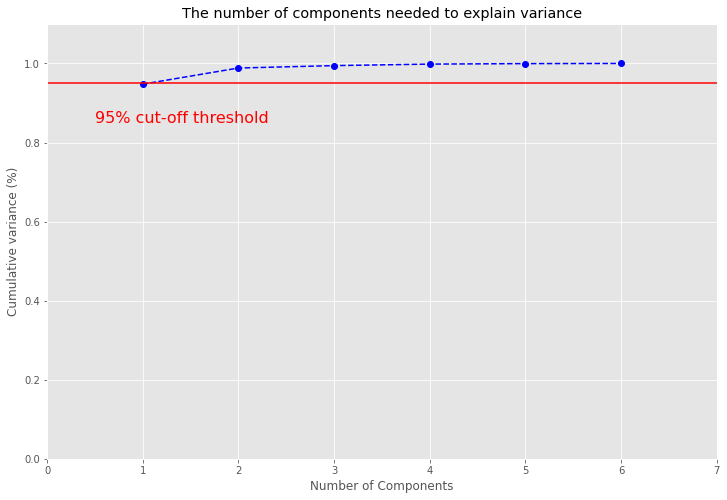

,1,2,3,4,5,6
0,0.947592,0.98843,0.994539,0.998364,0.999606,1.0


In [ ]:
plot_pca(pca=pca, figsize=(12,8))

In [ ]:
temp_df_5 = df_process_3_2.drop(columns=['Geneid', 'label'])

pca = PCA(n_components=2)
pca.fit(temp_df_5)
x_pca_a = pca.transform(temp_df_5)
print("original shape: ", temp_df_5.shape)
print("transformed shape: ", x_pca_a.shape)

original shape:  (17378, 6)
transformed shape:  (17378, 2)


In [ ]:
x_pca_a

array([[ -0.58221604,  30.79769588],
       [-23.8881318 , -30.04894095],
       [289.65973601,  39.28221412],
       ...,
       [-13.86502662,  15.21567389],
       [ 23.32657945,  68.69480617],
       [ 49.64516004, 221.87287035]])

In [ ]:
labels_list = [[i] for i in km.labels_]
labels_list[:10]

[[0], [2], [5], [2], [2], [2], [2], [0], [0], [2]]

In [ ]:
data_to_draw = np.concatenate((x_pca_a, labels_list), axis=1)
data_to_draw[:10]

array([[ -0.58221604,  30.79769588,   0.        ],
       [-23.8881318 , -30.04894095,   2.        ],
       [289.65973601,  39.28221412,   5.        ],
       [-23.92223806, -31.6217648 ,   2.        ],
       [-21.42823596,  -8.19158471,   2.        ],
       [  6.63400106,  -5.504732  ,   2.        ],
       [-24.02509669, -36.55269264,   2.        ],
       [ 34.30791565,  73.50502241,   0.        ],
       [ -4.53215753,  77.88286062,   0.        ],
       [ -0.60086616, -16.31819228,   2.        ]])

In [ ]:
# plt.figure(figsize=(25,25))
# plot_DBSCAN(data_to_draw[10000:12500])

In [ ]:
# plt.figure(figsize=(25,25))
# plot_DBSCAN(data_to_draw)

In [ ]:
# plt.figure(figsize=(25,25))
# plot_DBSCAN(data_to_draw)

In [ ]:
temp_df = pd.DataFrame(data_to_draw)
temp_df.columns = ['x', 'y', 'label']
temp_df

,x,y,label
0,-0.582216,30.797696,0.0
1,-23.888132,-30.048941,2.0
2,289.659736,39.282214,5.0
3,-23.922238,-31.621765,2.0
4,-21.428236,-8.191585,2.0
...,...,...,...
17373,-15.550480,-14.275798,2.0
17374,-18.602519,-16.621945,2.0
17375,-13.865027,15.215674,0.0
17376,23.326579,68.694806,0.0


#####Important

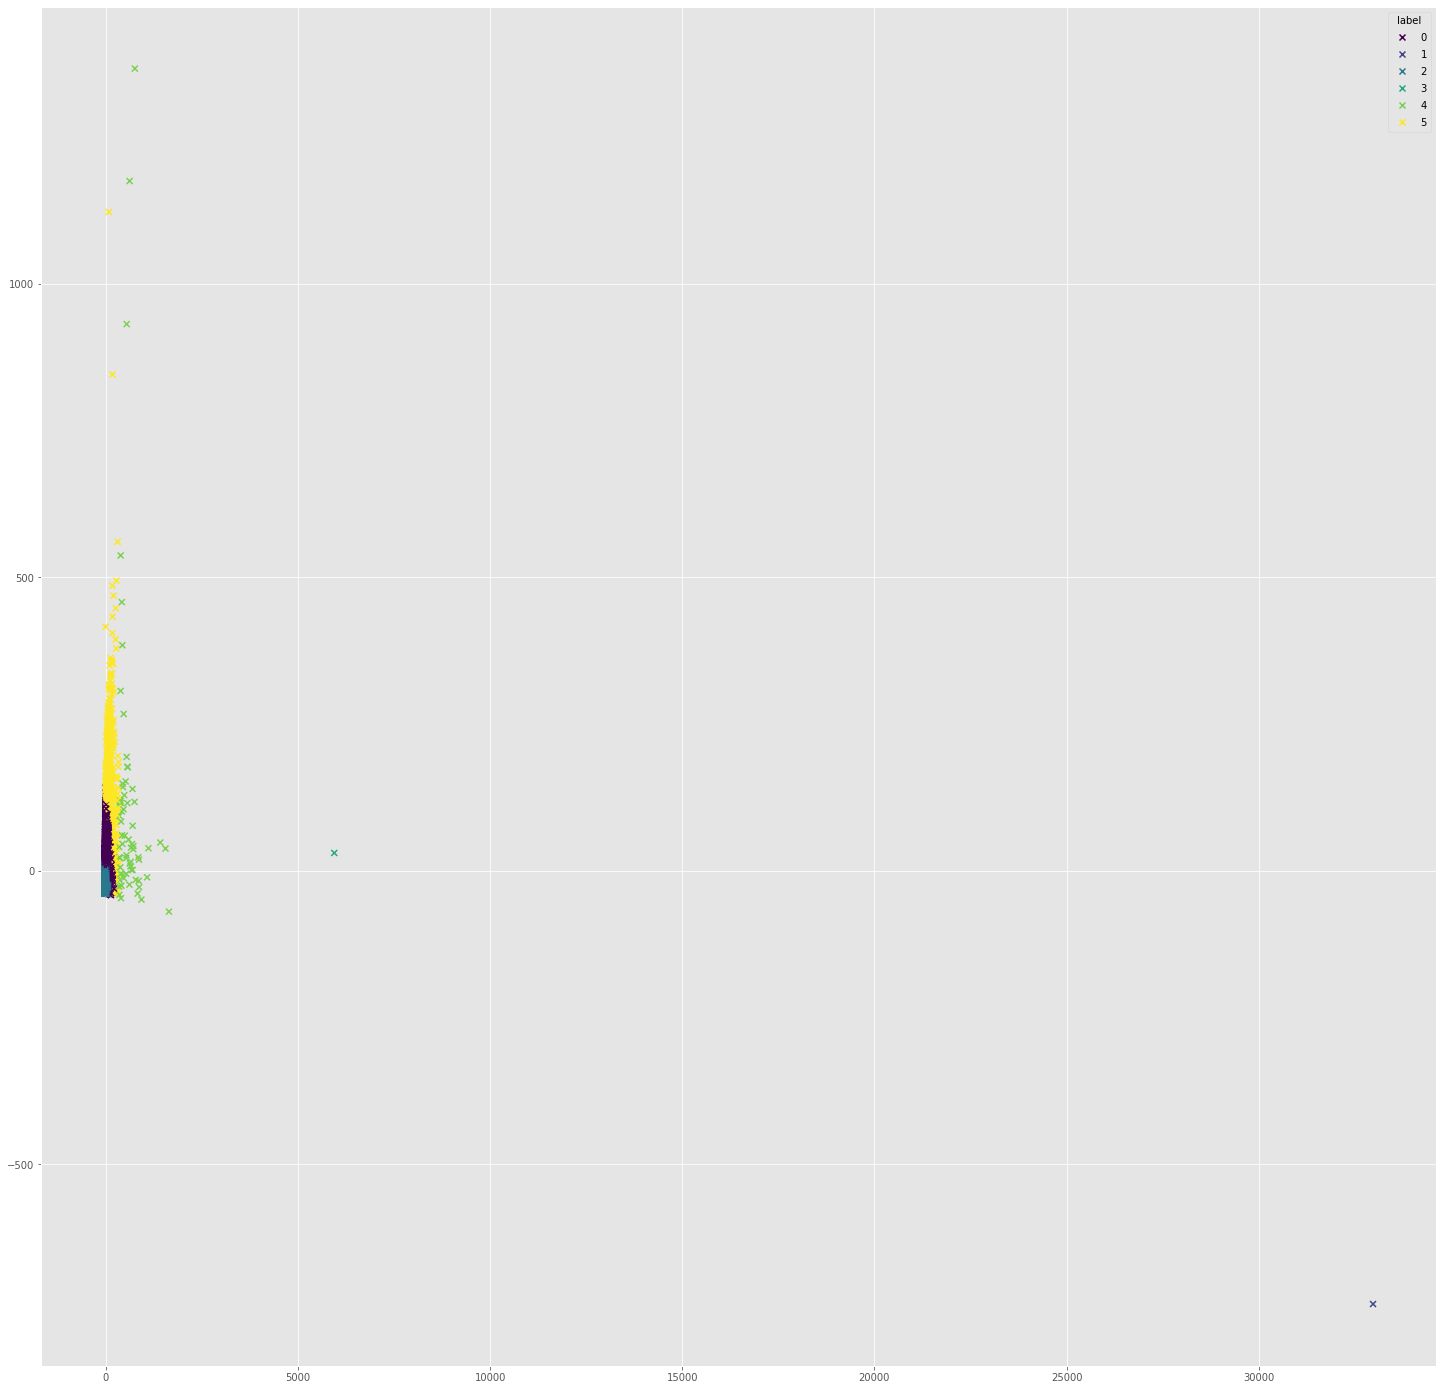

In [ ]:
plt.figure(figsize=(25,25))
plt.style.use("ggplot")
scatter = plt.scatter(temp_df['x'],temp_df['y'],c = temp_df['label'], marker='x')
plt.legend(*scatter.legend_elements(), title="label")
plt.show()

In [ ]:
temp_df['label'].value_counts()

2.0    12333
0.0     4041
5.0      933
4.0       69
3.0        1
1.0        1
Name: label, dtype: int64

In [ ]:
df_process_3_2[df_process_3_2['label'] == 5]

,Geneid,N1,N2,T1,T2,T3,T4,label
3,A2M,10,10,43,312,51,56,5
35,AASS,124,132,139,126,165,95,5
41,ABCA1,55,58,86,58,118,115,5
49,ABCA5,52,71,68,95,97,51,5
64,ABCB9,0,3,125,72,51,94,5
...,...,...,...,...,...,...,...,...
27756,ZNF652,45,24,130,94,77,93,5
27782,ZNF677,58,68,68,130,51,64,5
27783,ZNF678,38,37,116,88,184,148,5
27908,ZNF827,34,55,62,143,96,121,5


####K-means Part 2
with normalization

#####unnecessary

In [ ]:
df_process_2_2

,Geneid,N1,N2,T1,T2,T3,T4,label
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000,0
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000,0
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000,0
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,-1
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000,0
...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818,0
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468,0
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667,0
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143,0


In [ ]:
def get_score(k, df_data):
  km = cluster.KMeans(n_clusters=k)
  km.fit(df_data)
  return metrics.silhouette_score(df_data, km.labels_)

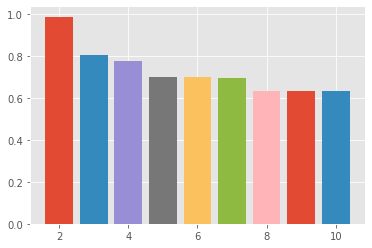

In [ ]:
for k in range(2, 11):
  plt.bar(k, get_score(k, df_process_2_2.drop(columns=['label', 'Geneid'])))

In [ ]:
km = cluster.KMeans(n_clusters=6)
km.fit(df_process_2_2.drop(columns=['label', 'Geneid']))

KMeans(n_clusters=6)

In [ ]:
km.labels_

array([0, 0, 0, ..., 0, 3, 0], dtype=int32)

In [ ]:
df_process_2_2['label'] = km.labels_
df_process_2_2

,Geneid,N1,N2,T1,T2,T3,T4,label
0,A1BG,0.0,1.0,5.600000,3.000000,6.800000,7.800000,0
1,A1BG-AS1,0.0,0.0,7.000000,0.000000,4.000000,5.000000,0
2,A1CF,0.0,1.0,2.100000,0.750000,1.800000,1.550000,0
3,A2M,0.0,0.0,33.000000,302.000000,41.000000,46.000000,5
4,A2M-AS1,0.0,0.0,4.000000,0.000000,5.000000,4.000000,0
...,...,...,...,...,...,...,...,...
28021,ZYG11A,0.0,1.0,0.181818,0.727273,1.818182,2.181818,0
28022,ZYG11B,0.0,1.0,0.246537,1.149584,0.371191,0.271468,0
28023,ZYX,1.0,0.0,0.750000,1.666667,0.083333,1.666667,0
28024,ZZEF1,1.0,0.0,8.000000,0.428571,4.714286,17.857143,3


In [ ]:
df_process_2_2['label'].value_counts()

0    23961
3     3319
2      651
5       87
1        5
4        3
Name: label, dtype: int64

In [ ]:
pca = PCA()
pca.fit(df_process_2_2.drop(columns=['Geneid', 'label']))
pca

PCA()

[1 2 3 4 5 6]
[0.65309652 0.92443743 0.98236566 0.99951581 0.99989021 1.        ]


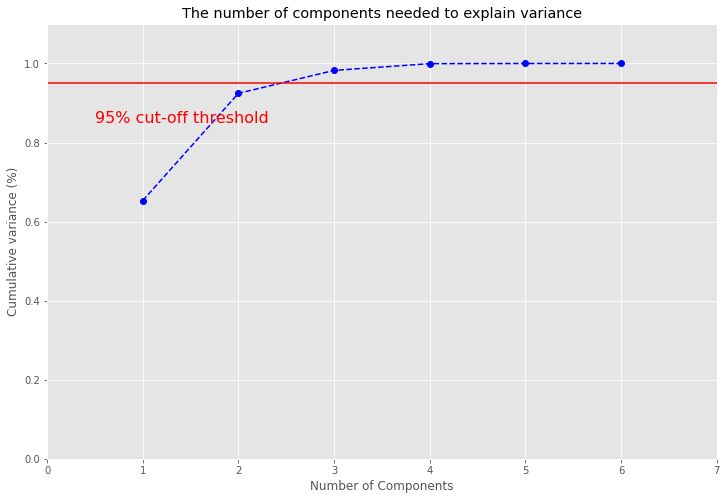

,1,2,3,4,5,6
0,0.653097,0.924437,0.982366,0.999516,0.99989,1.0


In [ ]:
plot_pca(pca=pca, figsize=(12,8))

In [ ]:
temp_df_5 = df_process_2_2.drop(columns=['Geneid', 'label'])

pca = PCA(n_components=2)
pca.fit(temp_df_5)
x_pca_a = pca.transform(temp_df_5)
print("original shape: ", temp_df_5.shape)
print("transformed shape: ", x_pca_a.shape)

original shape:  (28026, 6)
transformed shape:  (28026, 2)


In [ ]:
x_pca_a

array([[-0.36988443,  3.59283057],
       [-3.99797687,  2.00911998],
       [-5.04748294, -3.82038493],
       ...,
       [-4.5202515 , -5.19098771],
       [-0.28746093, 12.48554588],
       [-6.61495003, -5.47860318]])

In [ ]:
labels_list = [[i] for i in km.labels_]
labels_list[:10]

[[0], [0], [0], [5], [0], [0], [0], [3], [3], [0]]

In [ ]:
data_to_draw = np.concatenate((x_pca_a, labels_list), axis=1)
data_to_draw[:10]

array([[-3.69884435e-01,  3.59283057e+00,  0.00000000e+00],
       [-3.99797687e+00,  2.00911998e+00,  0.00000000e+00],
       [-5.04748294e+00, -3.82038493e+00,  0.00000000e+00],
       [ 3.01676520e+02, -3.24222463e+01,  5.00000000e+00],
       [-4.56278291e+00,  2.35431086e-01,  0.00000000e+00],
       [-6.21984165e+00, -5.27756412e+00,  0.00000000e+00],
       [-6.18497593e+00, -5.99847404e+00,  0.00000000e+00],
       [ 5.04460762e+00,  2.40920395e+01,  3.00000000e+00],
       [ 3.35514131e+01,  2.15870298e+01,  3.00000000e+00],
       [-5.18741621e+00, -4.24715232e+00,  0.00000000e+00]])

In [ ]:
temp_df = pd.DataFrame(data_to_draw)
temp_df.columns = ['x', 'y', 'label']
temp_df

,x,y,label
0,-0.369884,3.592831,0.0
1,-3.997977,2.009120,0.0
2,-5.047483,-3.820385,0.0
3,301.676520,-32.422246,5.0
4,-4.562783,0.235431,0.0
...,...,...,...
28021,-5.191062,-4.177991,0.0
28022,-5.390039,-6.240563,0.0
28023,-4.520251,-5.190988,0.0
28024,-0.287461,12.485546,3.0


#####Important

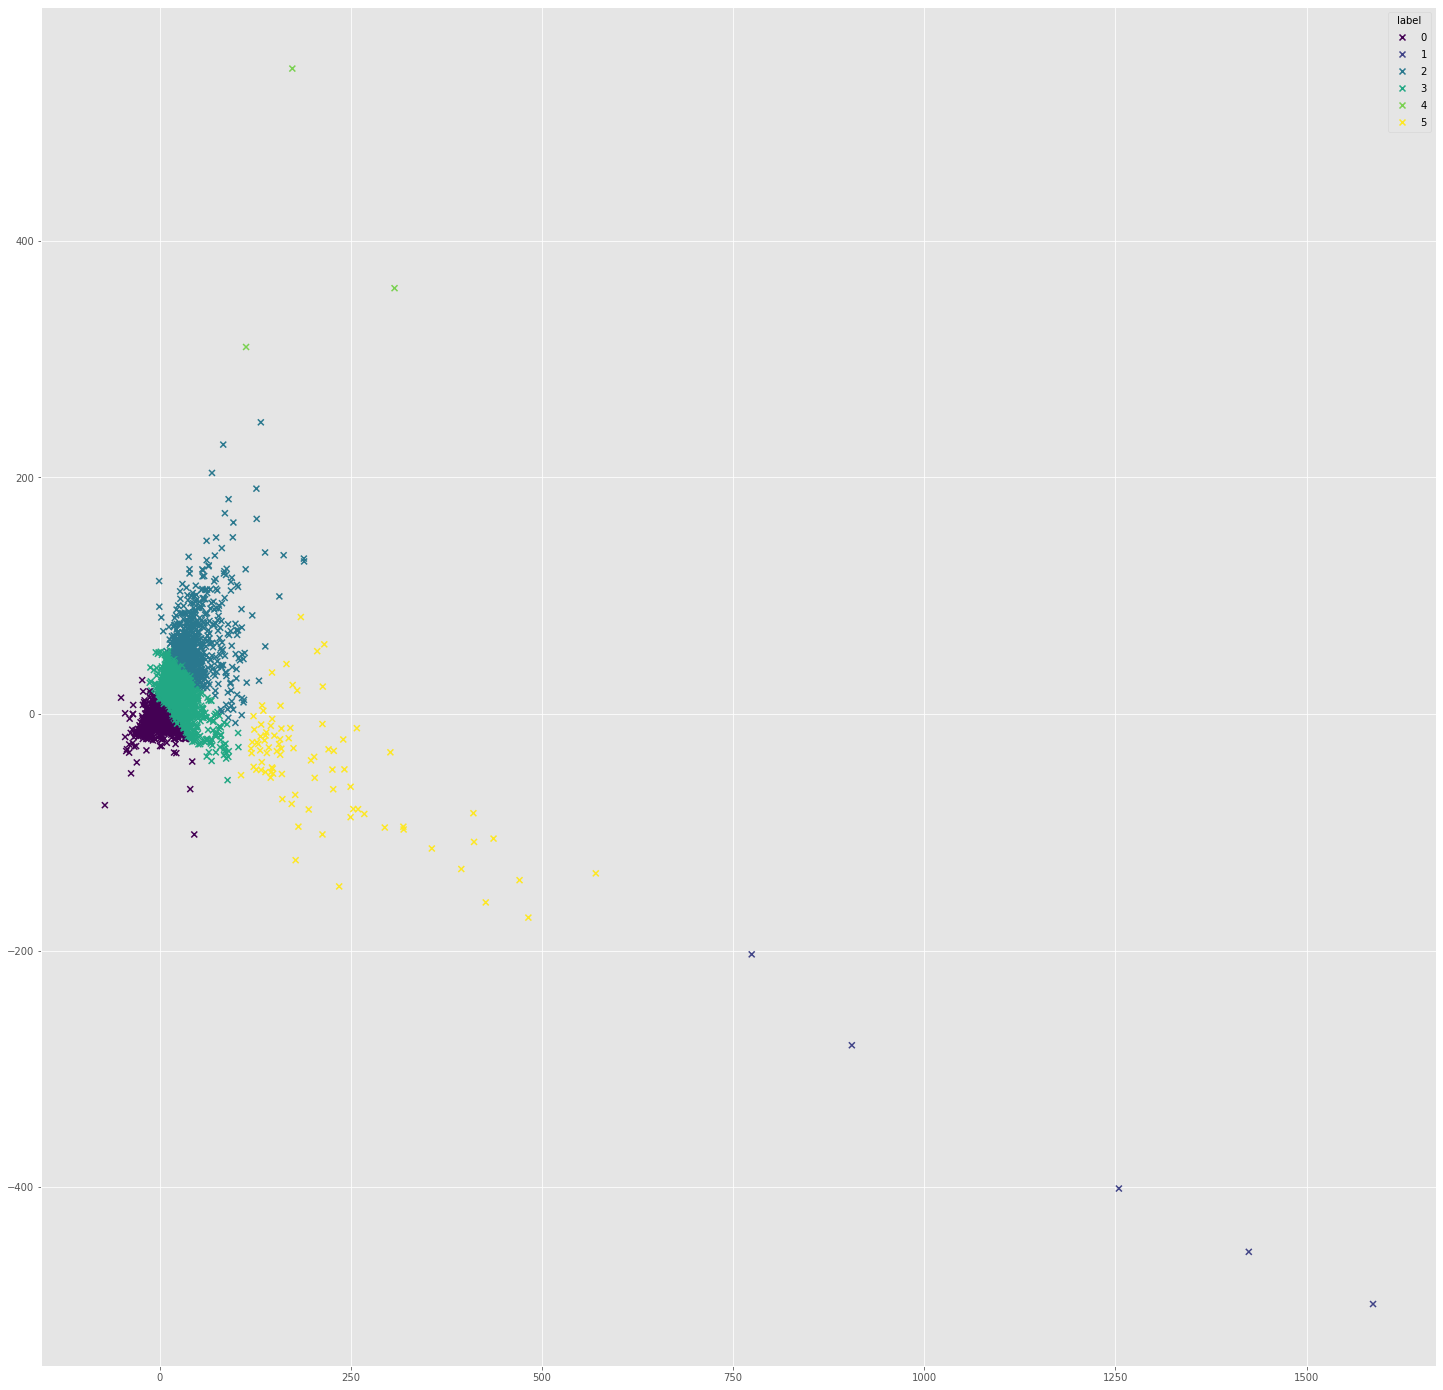

In [ ]:
plt.figure(figsize=(25,25))
plt.style.use("ggplot")
scatter = plt.scatter(temp_df['x'],temp_df['y'],c = temp_df['label'], marker='x')
plt.legend(*scatter.legend_elements(), title="label")
plt.show()

In [ ]:
temp_df['label'].value_counts()

0.0    23961
3.0     3319
2.0      651
5.0       87
1.0        5
4.0        3
Name: label, dtype: int64

###Part 4 Infogain
Why we reject InfoGain

####Import packages and define function

In [ ]:
!pip install info_gain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from info_gain import info_gain

In [ ]:
df_process_4 = df_ori.drop(columns=['Geneid']).T
df_process_4

,0,1,2,3,4,5,6,7,8,9,...,28016,28017,28018,28019,28020,28021,28022,28023,28024,28025
N1,7,0,1,10,0,119,44,0,0,0,...,11,0,0,0,26,37,1,24,72,76
N2,12,0,21,10,0,45,0,0,0,12,...,15,0,19,0,14,48,362,0,65,31
T1,35,7,43,43,4,131,18,25,17,6,...,37,26,17,15,18,39,90,18,121,25
T2,22,0,16,312,0,50,14,2,30,9,...,11,8,0,5,9,45,416,40,68,20
T3,41,4,37,51,5,100,15,13,9,15,...,36,3,7,2,15,57,135,2,98,46
T4,46,5,32,56,4,75,8,20,34,26,...,46,17,19,22,42,61,99,40,190,74


In [ ]:
df_process_4['label'] = ['N', 'N', 'T', 'T', 'T', 'T']
df_process_4

,0,1,2,3,4,5,6,7,8,9,...,28017,28018,28019,28020,28021,28022,28023,28024,28025,label
N1,7,0,1,10,0,119,44,0,0,0,...,0,0,0,26,37,1,24,72,76,N
N2,12,0,21,10,0,45,0,0,0,12,...,0,19,0,14,48,362,0,65,31,N
T1,35,7,43,43,4,131,18,25,17,6,...,26,17,15,18,39,90,18,121,25,T
T2,22,0,16,312,0,50,14,2,30,9,...,8,0,5,9,45,416,40,68,20,T
T3,41,4,37,51,5,100,15,13,9,15,...,3,7,2,15,57,135,2,98,46,T
T4,46,5,32,56,4,75,8,20,34,26,...,17,19,22,42,61,99,40,190,74,T


In [ ]:
def IGandIGR(df=pd.DataFrame(), label_col=''):
  IG_results = {}
  IGR_results = {}

  for col in df.columns:
    if col != label_col:
      IG_scores = info_gain.info_gain(df.iloc[ : , col], df[label_col])
      IGR_scores = info_gain.info_gain_ratio(df.iloc[ : , col], df[label_col])
      IG_results[str(col)] = IG_scores
      IGR_results[str(col)] = IGR_scores
    else:
      pass

  IG_results_sorted = sorted(IG_results.items(),key= lambda item:item[1], reverse= True)
  IGR_results_sorted = sorted(IGR_results.items(),key= lambda item:item[1], reverse= True)

  return IG_results_sorted, IGR_results_sorted

In [ ]:
IG_results_sorted, IGR_results_sorted = IGandIGR(df=df_process_4, label_col='label')

In [ ]:
for b, a in enumerate(IG_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f" %(index, name, score))
  if b == 50:
    break

  # if(score<0.01):
  #   df = df.drop([name], axis=1)

# print(df.info())

1) 28 = 0.636514
2) 132 = 0.636514
3) 190 = 0.636514
4) 378 = 0.636514
5) 401 = 0.636514
6) 414 = 0.636514
7) 481 = 0.636514
8) 626 = 0.636514
9) 839 = 0.636514
10) 840 = 0.636514
11) 897 = 0.636514
12) 967 = 0.636514
13) 981 = 0.636514
14) 1014 = 0.636514
15) 1119 = 0.636514
16) 1460 = 0.636514
17) 1517 = 0.636514
18) 1523 = 0.636514
19) 1551 = 0.636514
20) 1610 = 0.636514
21) 1698 = 0.636514
22) 1771 = 0.636514
23) 1999 = 0.636514
24) 2126 = 0.636514
25) 2136 = 0.636514
26) 2303 = 0.636514
27) 2314 = 0.636514
28) 2380 = 0.636514
29) 2416 = 0.636514
30) 2480 = 0.636514
31) 2531 = 0.636514
32) 2580 = 0.636514
33) 2676 = 0.636514
34) 2934 = 0.636514
35) 3003 = 0.636514
36) 3006 = 0.636514
37) 3019 = 0.636514
38) 3026 = 0.636514
39) 3219 = 0.636514
40) 3230 = 0.636514
41) 3274 = 0.636514
42) 3290 = 0.636514
43) 3334 = 0.636514
44) 3403 = 0.636514
45) 3413 = 0.636514
46) 3505 = 0.636514
47) 3599 = 0.636514
48) 3703 = 0.636514
49) 3704 = 0.636514
50) 3717 = 0.636514
51) 3819 = 0.636514


In [ ]:
remove_i = [int(v[0]) for v in IG_results_sorted if v[1] < 0.3]
len(remove_i)

4234

In [ ]:
remove_i[0]

32

In [ ]:
df_process_4 = df_ori.copy()

In [ ]:
df_process_4.iloc[remove_i]

,Geneid,N1,N2,T1,T2,T3,T4
32,AARSD1,0,20,2,0,0,0
335,ADAMTS7P1,33,0,0,0,0,3
817,ANKRD20A8P_1,0,2,0,1,0,0
1223,ARMCX1_1,2,0,3,0,0,0
1225,ARMCX3,2,0,0,1,0,0
...,...,...,...,...,...,...,...
26031,TSPEAR_1,1,0,0,1,0,1
26620,VAMP7,1,0,0,0,1,1
26792,VWA7,0,1,0,0,1,1
27824,ZNF716_1,0,1,1,0,1,0


In [ ]:
df_process_4.iloc[remove_i].describe()

,N1,N2,T1,T2,T3,T4
count,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000
mean,0.959376,0.611242,1.526689,1.380019,0.849079,2.895135
std,5.226661,3.104150,3.409437,10.651931,2.635712,5.494396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,2.000000,0.000000,1.000000,4.000000
max,73.000000,61.000000,63.000000,420.000000,50.000000,141.000000


In [ ]:
temp_df_4 = df_process_4.iloc[remove_i]
temp_df_4[temp_df_4['T4'] == 141]

,Geneid,N1,N2,T1,T2,T3,T4
3278,CEBPA,0,0,0,26,0,141


We regect Info Gain and Info Gain Ratio beacasue they will remove some inportant genes data

##Part 2

In [ ]:
temp_df_2[['mean_T1toT4', 'SD_T1toT4']]

KeyError: ignored

In [ ]:
dbscan = cluster.DBSCAN(eps=5, min_samples=2)
dbscan.fit(temp_df_2[['mean_T1toT4', 'SD_T1toT4']])
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16])

In [ ]:
labels_list = [[x] for x in dbscan.labels_] #build a double array list
labels_list[:10]

[[0], [0], [0], [-1], [0], [0], [0], [0], [0], [0]]

In [ ]:
temp_df_2[['mean_T1toT4', 'SD_T1toT4']].to_numpy()

array([[5.8       , 2.07203604],
       [4.        , 2.94392029],
       [1.55      , 0.57879185],
       ...,
       [1.04166667, 0.77130241],
       [7.75      , 7.41700106],
       [0.22777778, 0.54595407]])

In [ ]:
data_to_draw = np.concatenate((temp_df_2[['mean_T1toT4', 'SD_T1toT4']].to_numpy(), labels_list), axis=1)
data_to_draw[:10]

array([[ 5.80000000e+00,  2.07203604e+00,  0.00000000e+00],
       [ 4.00000000e+00,  2.94392029e+00,  0.00000000e+00],
       [ 1.55000000e+00,  5.78791845e-01,  0.00000000e+00],
       [ 1.05500000e+02,  1.31109369e+02, -1.00000000e+00],
       [ 3.25000000e+00,  2.21735578e+00,  0.00000000e+00],
       [ 5.94594595e-01,  4.68251856e-01,  0.00000000e+00],
       [ 3.12500000e-01,  9.53011032e-02,  0.00000000e+00],
       [ 1.50000000e+01,  9.96661093e+00,  0.00000000e+00],
       [ 2.25000000e+01,  1.15614301e+01,  0.00000000e+00],
       [ 1.16666667e+00,  7.35980072e-01,  0.00000000e+00]])

In [ ]:
# plot_DBSCAN(data_to_draw)

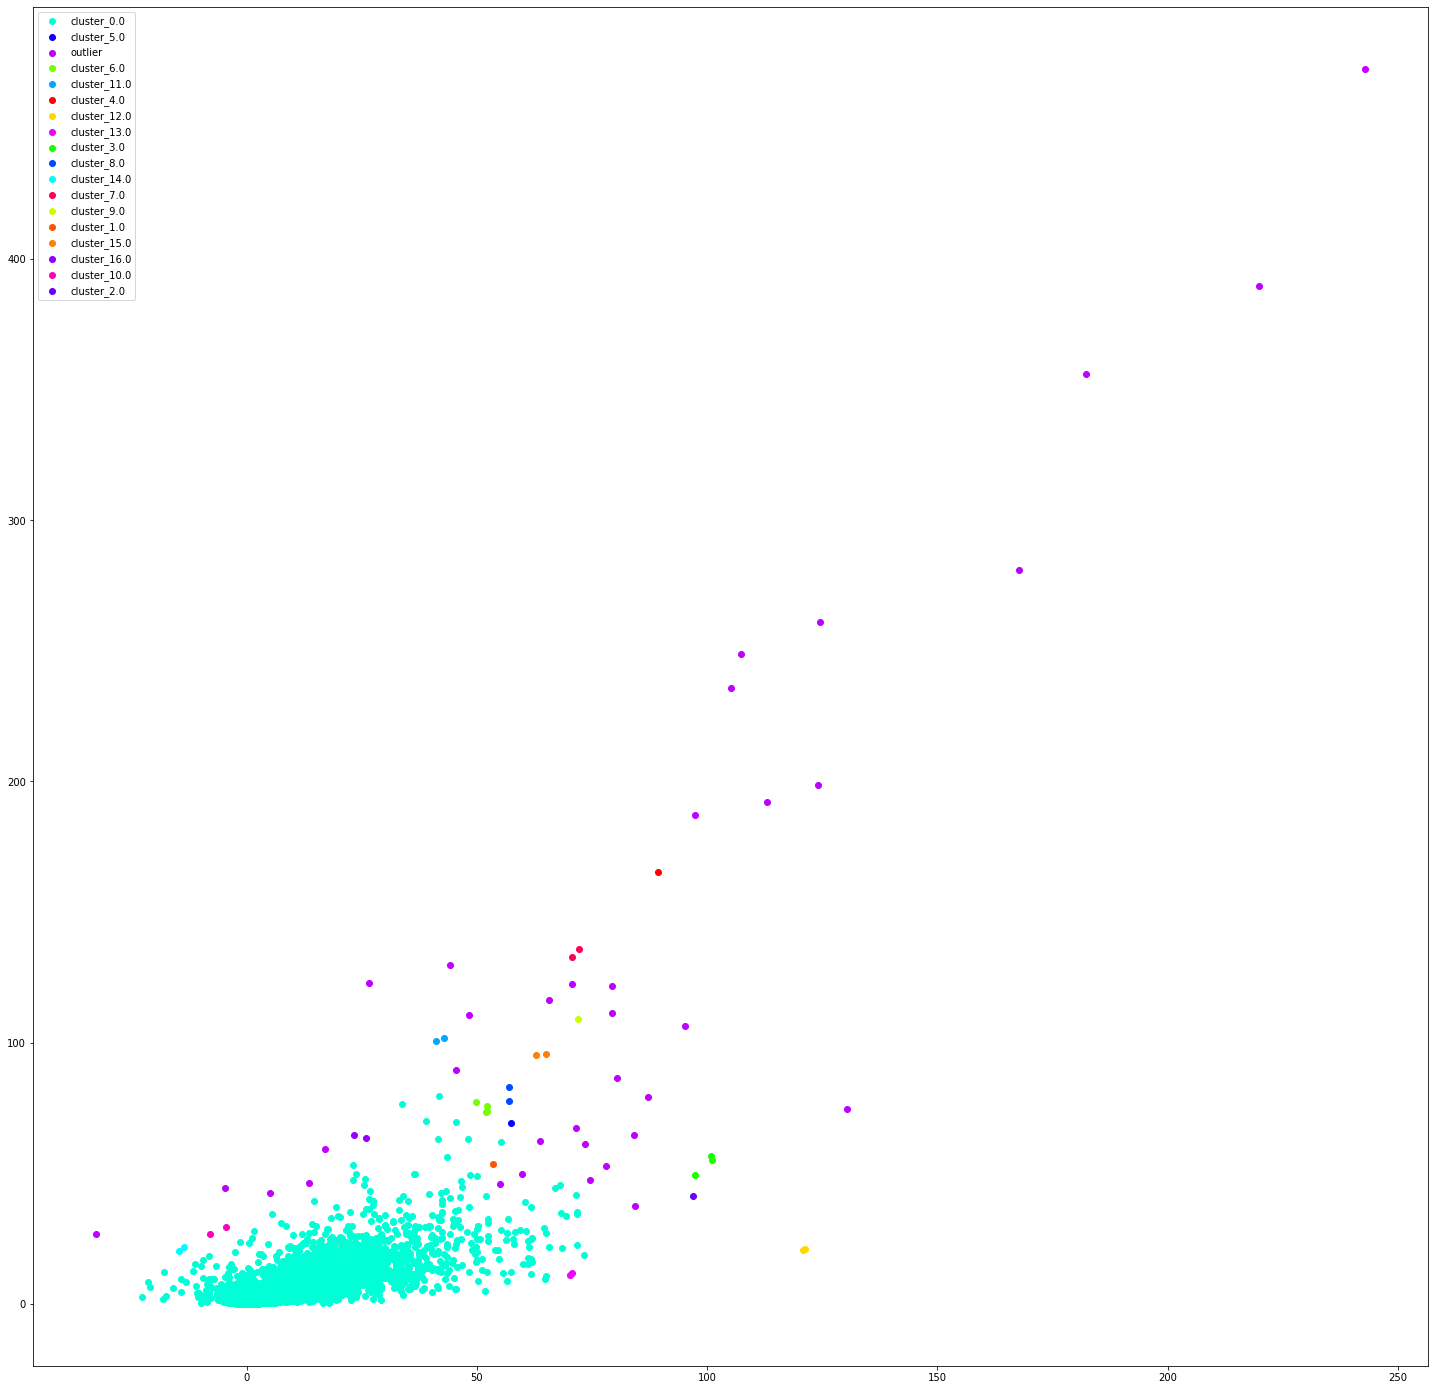

In [ ]:
plt.figure(figsize=(25,25))
plot_DBSCAN(data_to_draw[10000:])

In [ ]:
def get_score(k, df_data):
  km = cluster.KMeans(n_clusters=k)
  km.fit(df_data)
  return metrics.silhouette_score(df_data, km.labels_)

KeyboardInterrupt: ignored

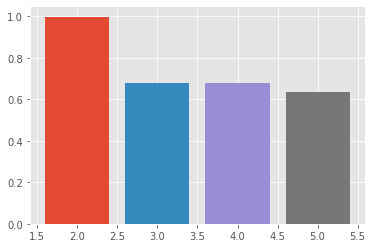

In [ ]:
for k in range(2, 11):
  plt.bar(k, get_score(k, df_process_3_2.drop(columns=['label', 'Geneid'])))

In [ ]:
km = cluster.KMeans(n_clusters=8)
km.fit(df_process_3_2.drop(columns=['label', 'Geneid']))

In [ ]:
km.labels_

In [ ]:
df_process_3_2['label'] = km.labels_
df_process_3_2

In [ ]:
df_process_3_2.columns[7]

In [ ]:
count_values(df=df_process_3_2, col_list=['label'])

In [ ]:
x_pca_a

In [ ]:
labels_list = [[i] for i in km.labels_]
labels_list[:10]

In [ ]:
data_to_draw = np.concatenate((x_pca_a, labels_list), axis=1)
data_to_draw[:10]

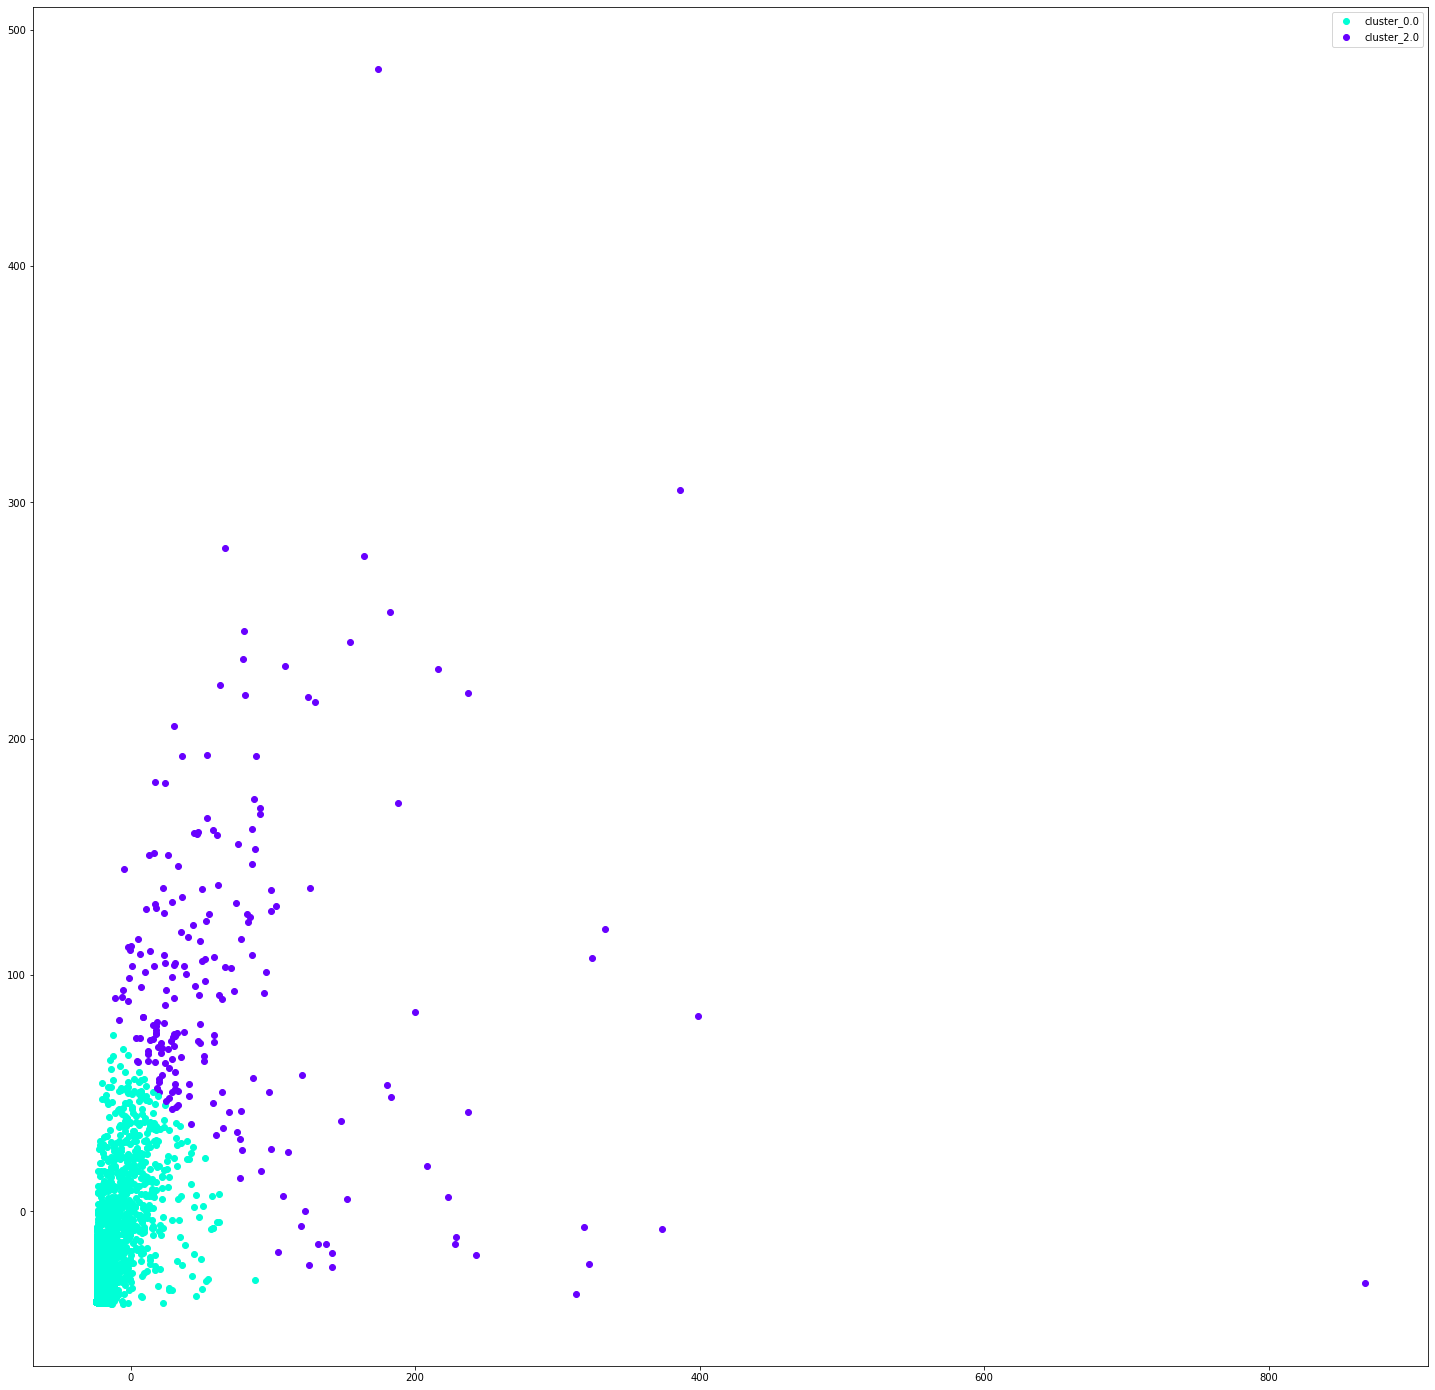

In [ ]:
plt.figure(figsize=(25,25))
plot_DBSCAN(data_to_draw[10000:12500])

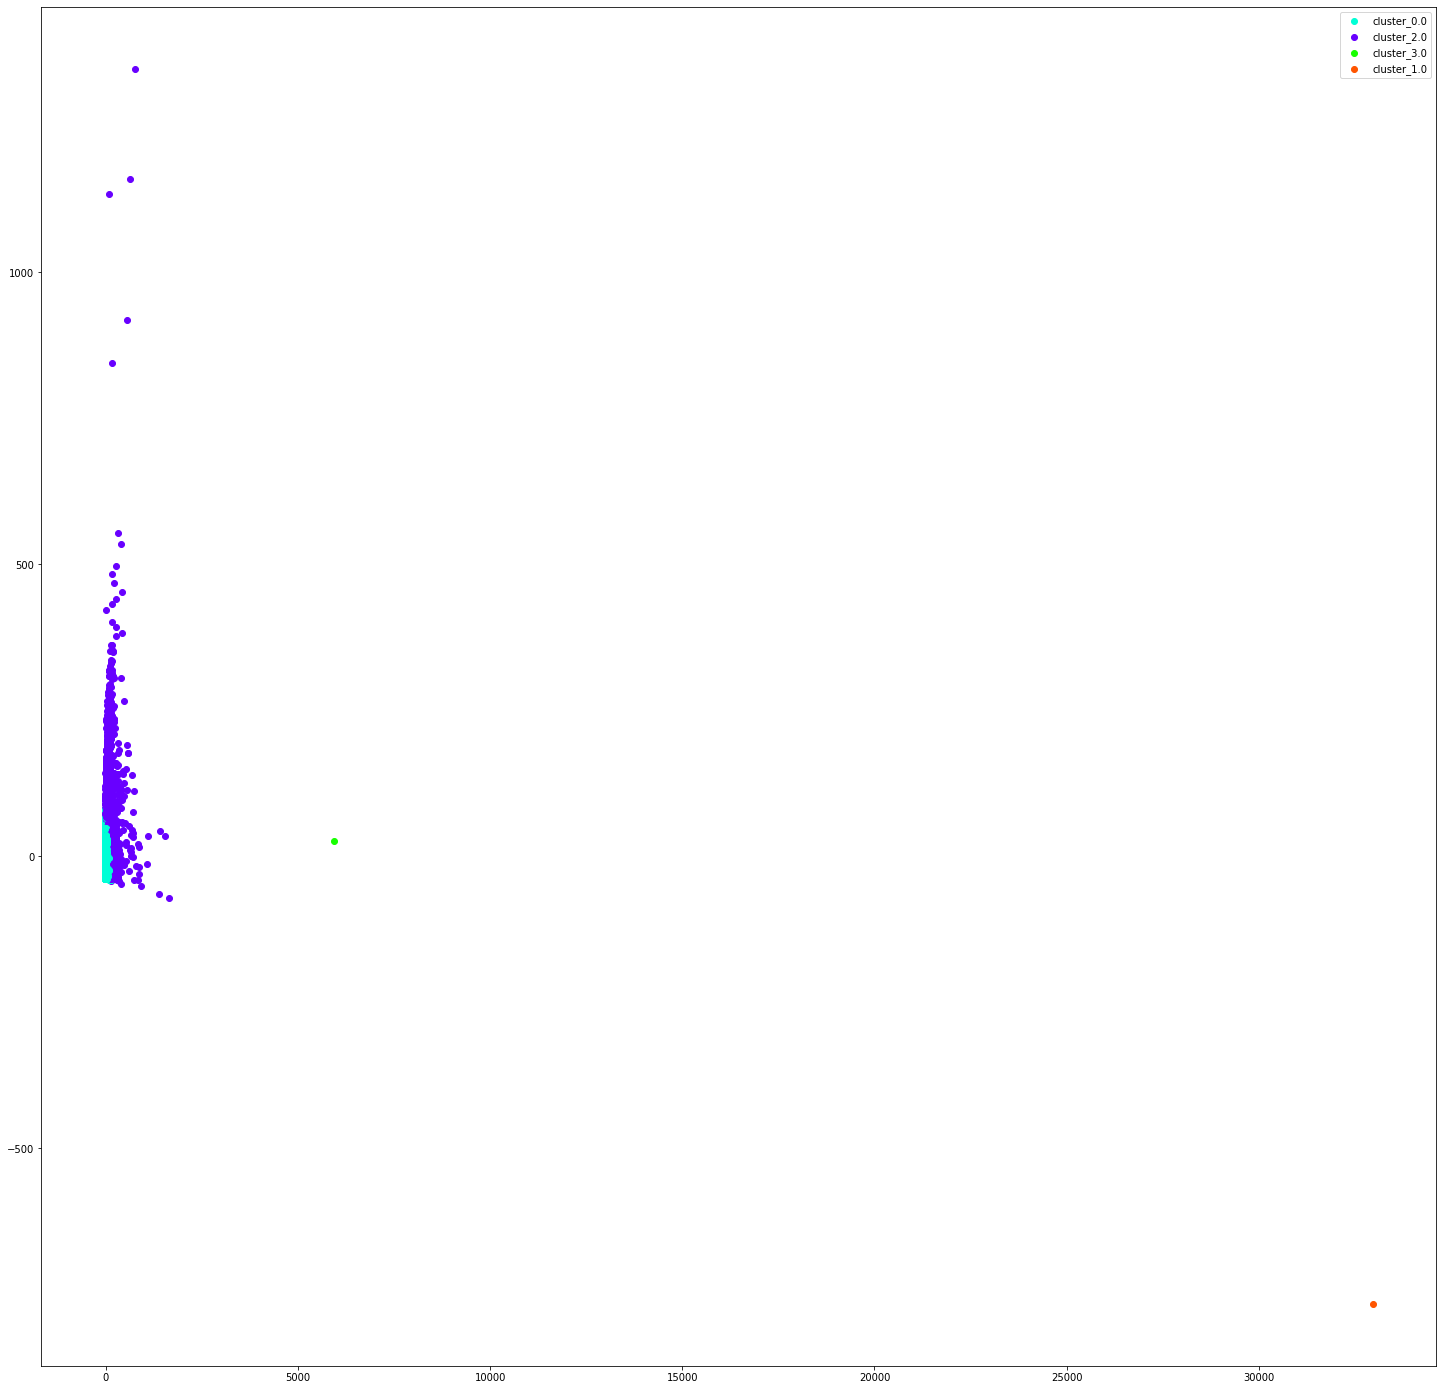

In [ ]:
plt.figure(figsize=(25,25))
plot_DBSCAN(data_to_draw)

In [ ]:
plt.figure(figsize=(25,25))
plot_DBSCAN(data_to_draw)

###Extract important message

In [ ]:
with open("/content/drive/MyDrive/智慧醫療/Final_Report/Datasets/result.txt") as f:
    text_file = f.readlines()
text_file

['Category\tTerm\tCount\t%\tPValue\tGenes\tList Total\tPop Hits\tPop Total\tFold Enrichment\tBonferroni\tBenjamini\tFDR\n',
 'DISGENET\tC0018781~Noise-induced hearing loss\t4\t1.486988847583643\t1.0971571754283066E-4\tENSG00000207758, ENSG00000215938, ENSG00000198997, ENSG00000284038\t43\t22\t9702\t41.02325581395349\t0.02513418483424268\t0.025454046469936712\t0.025454046469936712\n',
 'DISGENET\tC0019193~Hepatitis, Toxic\t6\t2.2304832713754648\t0.029297726282358966\tENSG00000265867, ENSG00000207758, ENSG00000199047, ENSG00000198997, ENSG00000207781, ENSG00000284038\t43\t404\t9702\t3.3509095095556067\t0.9989908333755454\t0.9710103567867544\t0.9710103567867544\n',
 'DISGENET\tC0860207~Drug-Induced Liver Disease\t6\t2.2304832713754648\t0.029297726282358966\tENSG00000265867, ENSG00000207758, ENSG00000199047, ENSG00000198997, ENSG00000207781, ENSG00000284038\t43\t404\t9702\t3.3509095095556067\t0.9989908333755454\t0.9710103567867544\t0.9710103567867544\n',
 'DISGENET\tC3658290~Drug-Induced A

In [ ]:
text_file = text_file[1:]
text_file

['DISGENET\tC0018781~Noise-induced hearing loss\t4\t1.486988847583643\t1.0971571754283066E-4\tENSG00000207758, ENSG00000215938, ENSG00000198997, ENSG00000284038\t43\t22\t9702\t41.02325581395349\t0.02513418483424268\t0.025454046469936712\t0.025454046469936712\n',
 'DISGENET\tC0019193~Hepatitis, Toxic\t6\t2.2304832713754648\t0.029297726282358966\tENSG00000265867, ENSG00000207758, ENSG00000199047, ENSG00000198997, ENSG00000207781, ENSG00000284038\t43\t404\t9702\t3.3509095095556067\t0.9989908333755454\t0.9710103567867544\t0.9710103567867544\n',
 'DISGENET\tC0860207~Drug-Induced Liver Disease\t6\t2.2304832713754648\t0.029297726282358966\tENSG00000265867, ENSG00000207758, ENSG00000199047, ENSG00000198997, ENSG00000207781, ENSG00000284038\t43\t404\t9702\t3.3509095095556067\t0.9989908333755454\t0.9710103567867544\t0.9710103567867544\n',
 'DISGENET\tC3658290~Drug-Induced Acute Liver Injury\t6\t2.2304832713754648\t0.029297726282358966\tENSG00000265867, ENSG00000207758, ENSG00000199047, ENSG00000

In [ ]:
new_arry = []
for item in text_file:
  temp_  = item.split("\t")
  new_arry.append(temp_)
new_arry[:2]

[['DISGENET',
  'C0018781~Noise-induced hearing loss',
  '4',
  '1.486988847583643',
  '1.0971571754283066E-4',
  'ENSG00000207758, ENSG00000215938, ENSG00000198997, ENSG00000284038',
  '43',
  '22',
  '9702',
  '41.02325581395349',
  '0.02513418483424268',
  '0.025454046469936712',
  '0.025454046469936712\n'],
 ['DISGENET',
  'C0019193~Hepatitis, Toxic',
  '6',
  '2.2304832713754648',
  '0.029297726282358966',
  'ENSG00000265867, ENSG00000207758, ENSG00000199047, ENSG00000198997, ENSG00000207781, ENSG00000284038',
  '43',
  '404',
  '9702',
  '3.3509095095556067',
  '0.9989908333755454',
  '0.9710103567867544',
  '0.9710103567867544\n']]

In [ ]:
diesease = []
for item in new_arry:
  diesease.append(item[1])
diesease

['C0018781~Noise-induced hearing loss',
 'C0019193~Hepatitis, Toxic',
 'C0860207~Drug-Induced Liver Disease',
 'C3658290~Drug-Induced Acute Liver Injury',
 'C1262760~Hepatitis, Drug-Induced',
 'C4277682~Chemical and Drug Induced Liver Injury',
 'C4279912~Chemically-Induced Liver Toxicity',
 'C0027055~Myocardial Reperfusion Injury']